Data Description:  

The data is related with direct marketing campaigns of a  Portuguese banking institution. The marketing campaigns  were based on phone calls. Often, more than one contact to  the same client was required, in order to access if the product  (bank term deposit) would be ('yes') or not ('no') subscribed.  

Domain:  

Banking  

Context:

Leveraging customer information is paramount for most  businesses. In the case of a bank, attributes of customers like  the ones mentioned below can be crucial in strategizing a  marketing campaign when launching a new product.  

Attribute Information:  

1. age​ (numeric) 
2. job​ : type of job (categorical:  'admin.','blue-collar','entrepreneur','housemaid','manage ment','retired','self-employed','services','student','technicia n','unemployed','unknown') 
3. marital​ : marital status (categorical:  'divorced','married','single','unknown'; note: 'divorced'  means divorced or widowed) 
4. education​ (categorical:  'basic.4y','basic.6y','basic.9y','high.school','illiterate','profes sional.course','university.degree','unknown')  
5. default​: has credit in default? (categorical:  'no','yes','unknown')  
6. balance​: average yearly balance, in euros (numeric)  
7. housing​: has housing loan? (categorical:  'no','yes','unknown')  
8. loan​: has personal loan? (categorical: 'no','yes','unknown')  
9. contact​: contact communication type (categorical:  'cellular','telephone')  
10. day​: last contact day of the month (numeric 1 -31)  
11. month​: last contact month of year (categorical: 'jan', 'feb',  'mar', ..., 'nov', 'dec')  
12. duration​: last contact duration, in seconds (numeric).  Important note: this attribute highly affects the output  target (e.g., if duration=0 then y='no'). Yet, the duration is  not known before a call is performed. Also, after the end  of the call y is obviously known. Thus, this input should  only be included for benchmark purposes and should be  discarded if the intention is to have a realistic predictive  model.  
13. campaign​: number of contacts performed during this  campaign and for this client (numeric, includes last  contact)  
14. pdays​: number of days that passed by after the client  was last contacted from a previous campaign (numeric;  999 means client was not previously contacted)  
15. previous​: number of contacts performed before this  campaign and for this client (numeric)  
16. poutcome​: outcome of the previous marketing  campaign (categorical: 'failure','nonexistent','success')  
17. target​: has the client subscribed a term deposit? (binary:  "yes","no")

Learning Outcomes: 

● Exploratory Data Analysis.
● Preparing the data to train a model .
● Training and making predictions using an Ensemble  Model  .
● Tuning an Ensemble model   .
  
 Objective:   
 
 The classification goal is to predict if the client will subscribe  (yes/no) a term deposit (variable y).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pandas
import numpy as numpy
import os
import matplotlib.pyplot as matplot
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import itertools
from IPython.display import Image  
from sklearn import tree
from os import system
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
numpy.random.seed(1234)
RandomState = numpy.random.seed(1234)
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import f
# In[8]:


class Perform_EDA():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        
    def EDA_Corr(df):
        """This gives output as Covariance matrix and feature wise uniquess i.e how much its statistically
        independent. This is done with default range of corr between +0.5 to -0.6"""
        corr = df.corr()
        index = corr.columns
        Output = []
        for i in range(0,len(index)):
            i = index[i]
            Pos = corr.index[(corr[i] >= 0.5)].tolist()
            No = corr.index[(corr[i] < 0.5) & (corr[i] > -0.6)].tolist()
            Neg = corr.index[(corr[i] <= -0.5)].tolist()
            leng_u = len(No)
            leng_pos = len(Pos)
            leng_neg = len(Neg)
            Out = [i, leng_u, leng_pos, leng_neg, Pos, Neg, No]
            Output.append(Out)
        fig, ax = matplot.subplots(figsize=(20,10))  
        sns.heatmap(corr,annot=True,vmin=-1,vmax=1,cmap='Blues', linewidths=0, ax = ax)
        Output1 = pandas.DataFrame(Output, columns= ['Feature','Uniqueness','Positive rel', 'inverse rel', 'Pos', 'Neg', 'No'])
        return Output1

    def EDA(df):
        """This function creates a dataframe transpose with 5 point summary, Kurtosis, Skewness, IQR, Range
        Total count of missing values, % missing values against the total records"""
        EDA = pandas.DataFrame((df.describe()).T)
        EDA["Kurtosis"] = df.kurtosis()
        EDA["Skewness"] = df.skew()
        EDA["Range"] = EDA['max'] -  EDA['min']
        EDA["IQR"] = EDA['75%'] -  EDA['25%']
        EDA["Missing Values"] = df.shape[0] - EDA["count"]
        print("Total Missing Values = ", EDA['Missing Values'].sum(), "Data Points, Contributing to ", 
              (round(((EDA['Missing Values'].sum())/len(df)),2))*100,"%")
        print("Columns with values as 0\n\n",pandas.Series((EDA.loc[EDA['min'] == 0]).index),'\n')
        indices = EDA[EDA['min'] == 0].index
        print("\nColumns with numnber of Zeros\n")
        for i in range(0,len(indices)):
            j = indices[i]
            print(j,"   =",(df[j].value_counts())[0])
        return EDA
    
    def NaN_treatment_median(df):
        EDA_Summary = Perform_EDA.EDA(df)
        Missing_Value_Columns = pandas.Series((EDA_Summary.loc[EDA_Summary['Missing Values'] != 0]).index)
        len(Missing_Value_Columns)
        for i in range(0,len(Missing_Value_Columns)):
            df[Missing_Value_Columns[i]].fillna(df[Missing_Value_Columns[i]].median(), inplace = True)
        return df
    
    def NaN_treatment_mean(df):
        EDA_Summary = Perform_EDA.EDA(df)
        Missing_Value_Columns = pandas.Series((EDA_Summary.loc[EDA_Summary['Missing Values'] != 0]).index)
        len(Missing_Value_Columns)
        for i in range(0,len(Missing_Value_Columns)):
            df[Missing_Value_Columns[i]].fillna(df[Missing_Value_Columns[i]].mean(), inplace = True)
        return df
    
    def Zero_Values_Treatment_Median(df):
        EDA_Summary = Perform_EDA.EDA(df)
        Zero_Value_Columns = pandas.Series((EDA_Summary.loc[EDA_Summary['min'] == 0]).index)
        for i in range(0,len(Zero_Value_Columns)):
            df[Zero_Value_Columns[i]].replace(0,(df[Zero_Value_Columns[i]]).median(), inplace = True)
        return df
    
    def Zero_Values_Treatment_Mean(df):
        EDA_Summary = Perform_EDA.EDA(df)
        Zero_Value_Columns = pandas.Series((EDA_Summary.loc[EDA_Summary['min'] == 0]).index)
        for i in range(0,len(Zero_Value_Columns)):
            df[Zero_Value_Columns[i]].replace(0,(df[Zero_Value_Columns[i]]).mean(), inplace = True)
        return df

    def Missing_Values(df):
        for i in range(0,len(df.columns)):
            i = df.columns[i]
            print(i,'\n\n',df[i].value_counts(),'\n\n',(df[i].value_counts()).sum(),'\n\n')
        return Missing_Values
    
    def EDA_target(df,Y):
        DF = pandas.DataFrame(Y.value_counts())
        DF['Contribution'] = round(((DF['class'])/len(df)*100),2)
        Missing_values = len(df) - (Y.value_counts()).sum()
        print("Total Missing Values = ", Missing_values, "Data Points, Contributing to ",
              round(((Missing_values/len(df))*100),2),"%")
        return DF
    
    def univariate_plots(Source):
        print("Columns that are int32,int64 = ",Source.select_dtypes(include=['int32','int64']).columns)
        print("Columns that are flaot32,float64 = ",Source.select_dtypes(include=['float64']).columns)
        print("Columns that are objects = ",Source.select_dtypes(include=['object']).columns)
        a = pandas.Series(Source.select_dtypes(include=['int32','int64']).columns)
        leng = len(a)
        for j in range(0,len(a)):
            f, axes = matplot.subplots(1, 2, figsize=(10, 10))
            sns.boxplot(Source[a[j]], ax = axes[0])
            sns.distplot(Source[a[j]], ax = axes[1])
            matplot.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

        a = pandas.Series(Source.select_dtypes(include=['float64']).columns)
        leng = len(a)
        for j in range(0,len(a)):
            matplot.Text('Figure for float64')
            f, axes = matplot.subplots(1, 2, figsize=(10, 10))
            sns.boxplot(Source[a[j]], ax = axes[0])
            sns.distplot(Source[a[j]], ax = axes[1])
            matplot.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

        a = pandas.Series(Source.select_dtypes(include=['object']).columns)
        leng = len(a)
        for j in range(0,len(a)):
            matplot.subplots()
            sns.countplot(Source[a[j]])
            
    def Impute_Outliers(df,method = "median",threshold = 0.1):
            """Pls input the method as a string - mean or median with 'm' in lower case
            Default method = median
            Detault threshold = 0.1
            The function will give 3 outputs 
            1. df data imputed based on the value provided
            2. Outlier impact as a printed message with % of records impacted
            """
            df_Columns = df.columns
            Subset_Columns = pandas.Series(df.select_dtypes(include=['int32','int64','float64','float32']).columns)

            Subset = df[Subset_Columns]

            IQR = Subset.quantile(0.75) - Subset.quantile(0.25)

            Q3_values = Subset.quantile(0.75) + (1.5 * IQR)
            Q1_values = Subset.quantile(0.25) - (1.5 * IQR)

            Q1 = []
            for i in range(1,len(Subset_Columns)+1):
                c = "Q1"+str(i)
                Q1.append(c)

            Q3 = []
            for i in range(1,len(Subset_Columns)+1):
                c = "Q3"+str(i)
                Q3.append(c)

            df[Q3] = Subset > Q3_values[0:len(Subset_Columns)]
            df[Q1] = Subset < Q1_values[0:len(Subset_Columns)]

            Q1_Outliers = []
            Q1_j = []
            Q3_Outliers = []
            Q3_j = []
            for i in range(0,len(Q1)):
                i = Q1[i]
                No = df.shape[0] - df[i].value_counts()[0]
                Q1_Outliers.append(No)
                Q1_j.append(i)
            Q1_Col = pandas.DataFrame(Q1_j, columns=["Q1"])
            Q1_outliers = pandas.DataFrame(Q1_Outliers, columns=["Q1 Outliers"])
            Outliers_impact_Q1 = Q1_Col.join(Q1_outliers)

            for i in range(0,len(Q3)):
                i = Q3[i]
                No = df.shape[0] - df[i].value_counts()[0]
                Q3_Outliers.append(No)
                Q3_j.append(i)
            Q3_Col = pandas.DataFrame(Q3_j, columns=["Q3"])
            Q3_outliers = pandas.DataFrame(Q3_Outliers, columns=["Q3 Outliers"])
            Outliers_impact_Q3 = Q3_Col.join(Q3_outliers)

            Outliers_impact = Outliers_impact_Q1['Q1 Outliers']+Outliers_impact_Q3['Q3 Outliers']
            Outliers_impact = (pandas.DataFrame(Subset_Columns, columns=["Column Name"])).join(pandas.DataFrame(Outliers_impact, columns=["No of Outliers"]))
            print(Outliers_impact)


            aij = []
            for i in range(0,len(Q3)):
                i = Q3[i]
                bij = ((pandas.DataFrame(df[i])).index[(df[i] == True)].tolist())
                aij = aij + bij
            Q3_indices = (pandas.Series(aij)).value_counts()


            cij = []
            for i in range(0,len(Q1)):
                i = Q1[i]
                dij = ((pandas.DataFrame(df[i])).index[(df[i] == True)].tolist())
                cij = cij + dij
            Q1_indices = (pandas.Series(cij)).value_counts()

            print("No of records impacted by Outliers = ",round((Outliers_impact['No of Outliers'].sum() / len(df)),2)*100,"%")
            print("No of records in outliers beyond Q4 = ",round(((pandas.DataFrame(Q3_Outliers)[0]).sum() / len(df)),2)*100,"%")
            print("No of records in outliers beyond Q1 = ",round(((pandas.DataFrame(Q1_Outliers)[0]).sum() / len(df)),2)*100,"%")

            if (round((Outliers_impact['No of Outliers'].sum() / len(df)),2)) <= threshold :
                print((round((Outliers_impact['No of Outliers'].sum() / len(df)),2)*100)," ",threshold)
                Outliers_Q3_Q1 = pandas.DataFrame(Q3_values, columns = ['Q3_values']).join(pandas.DataFrame(Q1_values, columns=['Q1_values']))
                for i in range(0,len(Subset_Columns)):
                    Q3 = ((Outliers_Q3_Q1).T)[Subset_Columns[i]].loc['Q3_values']
                    Q1 = ((Outliers_Q3_Q1).T)[Subset_Columns[i]].loc['Q1_values']
                    df.loc[df[Subset_Columns[i]] > Q3, Subset_Columns[i]] = numpy.nan
                    df.loc[df[Subset_Columns[i]] < Q1, Subset_Columns[i]] = numpy.nan
                    if method == "median":
                        median1 = ((df.loc[(df[Subset_Columns[i]]<((((Outliers_Q3_Q1).T)[Subset_Columns[i]])['Q3_values'])) & 
                         (df[Subset_Columns[i]]>((((Outliers_Q3_Q1).T)[Subset_Columns[i]])['Q1_values']))])[Subset_Columns[i]]).median()
                    else:
                        median1 = ((df.loc[(df[Subset_Columns[i]]<((((Outliers_Q3_Q1).T)[Subset_Columns[i]])['Q3_values'])) & 
                         (df[Subset_Columns[i]]>((((Outliers_Q3_Q1).T)[Subset_Columns[i]])['Q1_values']))])[Subset_Columns[i]]).mean()
                df.replace(numpy.nan,median1,inplace= True)
                print("No of records imputed using the",method,"is",Outliers_impact['No of Outliers'].sum())
                df = df.iloc[:,0:len(df_Columns)]
                return df    
            else:
                print((round((Outliers_impact['No of Outliers'].sum() / len(df)),2))," ",threshold)
                print("Too many outliers, please alter the 'threshold' if outliers will have to be treated")
                df = df.iloc[:,0:len(df_Columns)]
                return df
        
class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX,alpha):
        result = ""
        if self.p<alpha:
            result="{0} exhibits multicollinearity. (Consider Discarding {0} from model)".format(colX)
        else:
            result="{0} is NOT related and can be a good predictor".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY,alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pandas.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pandas.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        #print(self.dfExpected)
        self._print_chisquare_result(colX,alpha)
        return self.dfExpected

In [2]:
#Import all the necessary modules
import pandas as pandas
import numpy as numpy
import os
import matplotlib.pyplot as matplot
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
#from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import itertools
from IPython.display import Image  
from sklearn import tree
from os import system
import numpy as np
import pandas as pd
from scipy.stats import levene, shapiro, f_oneway
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
numpy.random.seed(1234)

In [139]:
df=pd.read_csv("bank-full.csv")

In [140]:
df.shape

(45211, 17)

In [141]:
df.head(100)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,36,management,married,tertiary,no,101,yes,yes,unknown,5,may,426,1,-1,0,unknown,no
96,55,blue-collar,married,secondary,no,383,no,no,unknown,5,may,287,1,-1,0,unknown,no
97,60,retired,married,tertiary,no,81,yes,no,unknown,5,may,101,1,-1,0,unknown,no
98,39,technician,married,secondary,no,0,yes,no,unknown,5,may,203,1,-1,0,unknown,no


In [142]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
Target
['no' 'yes']


In [143]:
# Step 1: Change all Yes=1 and No=0
# Step 1.1 : Change pdays -1 to 999 as mentioned in document.
df['Target'] = df['Target'].apply(lambda x: 0 if x=='no' else 1)
df['default'] = df['default'].apply(lambda x: 0 if x=='no' else 1)
df['housing'] = df['housing'].apply(lambda x: 0 if x=='no' else 1)
df['loan'] = df['loan'].apply(lambda x: 0 if x=='no' else 1)
df['pdays'] = df['pdays'].apply(lambda x: 999 if x==-1 else x)

In [144]:
# Step 2: Change month name to numeric value
d = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8,'sep':9, 'oct':10, 'nov':11, 'dec':12}
df.month = df.month.map(d)

In [145]:
# Step 3: Change the unit of 'duration' from seconds to minutes
df['duration'] = df['duration'].apply(lambda n:n/60).round(0)

In [146]:
#Missing values processing in balance column
df.loc[df.balance < 0, 'balance'] = df.balance.median()
df.fillna(df.median())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,0,2143.0,1,0,unknown,5,5,4.0,1,999,0,unknown,0
1,44,technician,single,secondary,0,29.0,1,0,unknown,5,5,3.0,1,999,0,unknown,0
2,33,entrepreneur,married,secondary,0,2.0,1,1,unknown,5,5,1.0,1,999,0,unknown,0
3,47,blue-collar,married,unknown,0,1506.0,1,0,unknown,5,5,2.0,1,999,0,unknown,0
4,33,unknown,single,unknown,0,1.0,0,0,unknown,5,5,3.0,1,999,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825.0,0,0,cellular,17,11,16.0,3,999,0,unknown,1
45207,71,retired,divorced,primary,0,1729.0,0,0,cellular,17,11,8.0,2,999,0,unknown,1
45208,72,retired,married,secondary,0,5715.0,0,0,cellular,17,11,19.0,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668.0,0,0,telephone,17,11,8.0,4,999,0,unknown,0


In [147]:
#After pre-processing there is no missing values
df.count()

age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
Target       45211
dtype: int64

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null int64
balance      45211 non-null float64
housing      45211 non-null int64
loan         45211 non-null int64
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null int64
duration     45211 non-null float64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null int64
dtypes: float64(2), int64(10), object(5)
memory usage: 5.9+ MB


In [13]:
Perform_EDA.EDA(df)

Total Missing Values =  0.0 Data Points, Contributing to  0.0 %
Columns with values as 0

 0     default
1     balance
2     housing
3        loan
4    duration
5    previous
6      Target
dtype: object 


Columns with numnber of Zeros

default    = 44396
balance    = 3514
housing    = 20081
loan    = 37967
duration    = 2010
previous    = 36954
Target    = 39922


,count,mean,std,min,25%,50%,75%,max,Kurtosis,Skewness,Range,IQR,Missing Values
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0,0.319570,0.684818,77.0,15.0,0.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0,50.497694,7.245375,1.0,0.0,0.0
balance,45211.0,1426.051713,3014.917889,0.0,175.0,448.0,1428.0,102127.0,145.788635,8.562680,102127.0,1253.0,0.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0,-1.949566,-0.224766,1.0,1.0,0.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0,1.432253,1.852617,1.0,0.0,0.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0,-1.059897,0.093079,30.0,13.0,0.0
month,45211.0,6.144655,2.408034,1.0,5.0,6.0,8.0,12.0,0.048579,0.242842,11.0,3.0,0.0
duration,45211.0,4.296720,4.308704,0.0,2.0,3.0,5.0,82.0,17.886294,3.109846,82.0,3.0,0.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0,39.249651,4.898650,62.0,2.0,0.0
pdays,45211.0,857.565283,303.245691,1.0,999.0,999.0,999.0,999.0,1.156176,-1.736705,998.0,0.0,0.0


In [14]:
#Data is skewed towards customer having no deposit
df.Target.value_counts()/df.Target.count()

0    0.883015
1    0.116985
Name: Target, dtype: float64

Columns that are int32,int64 =  Index(['age', 'default', 'housing', 'loan', 'day', 'month', 'campaign',
       'pdays', 'previous', 'Target'],
      dtype='object')
Columns that are flaot32,float64 =  Index(['balance', 'duration'], dtype='object')
Columns that are objects =  Index(['job', 'marital', 'education', 'contact', 'poutcome'], dtype='object')


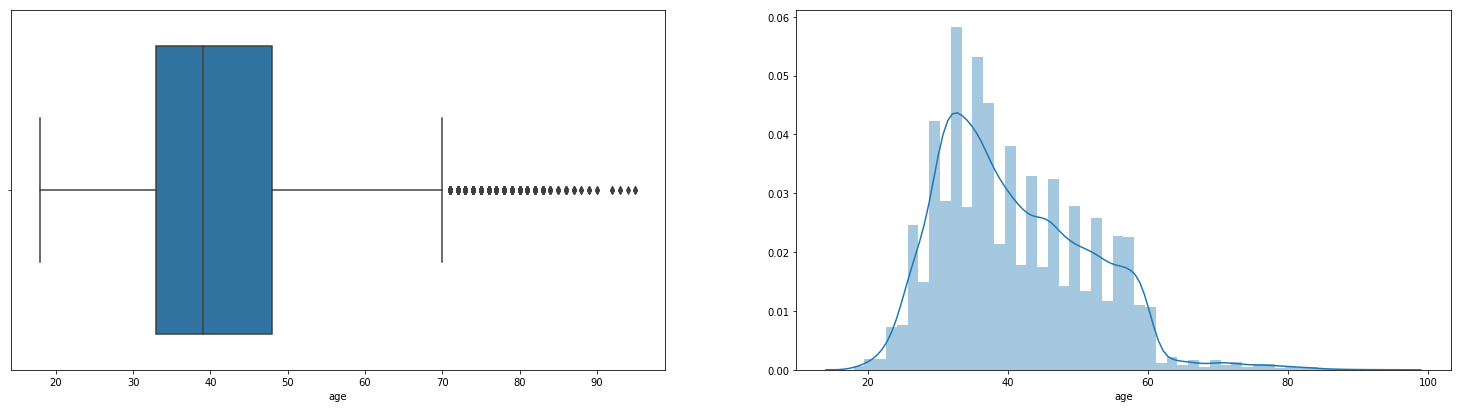

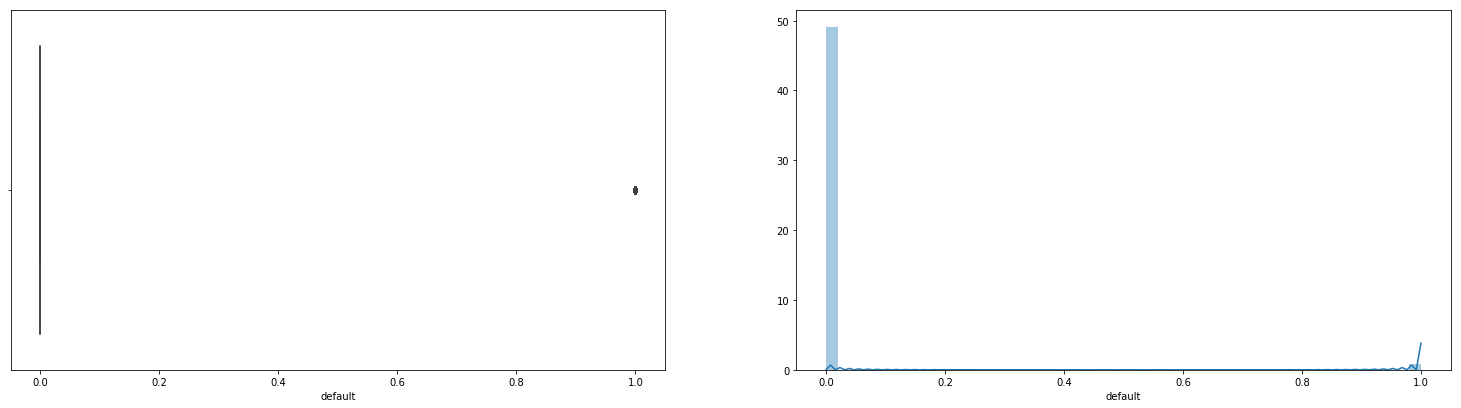

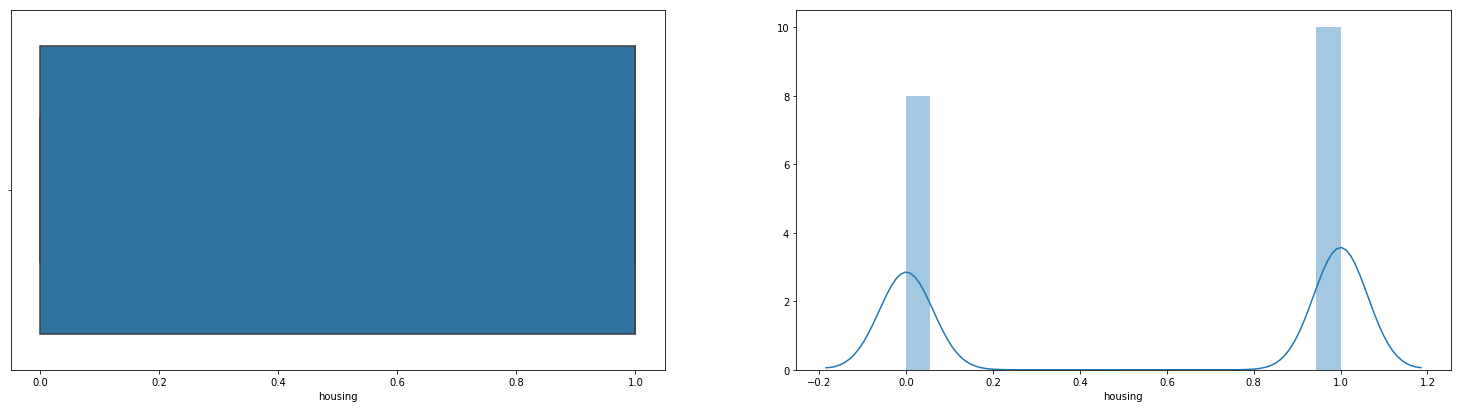

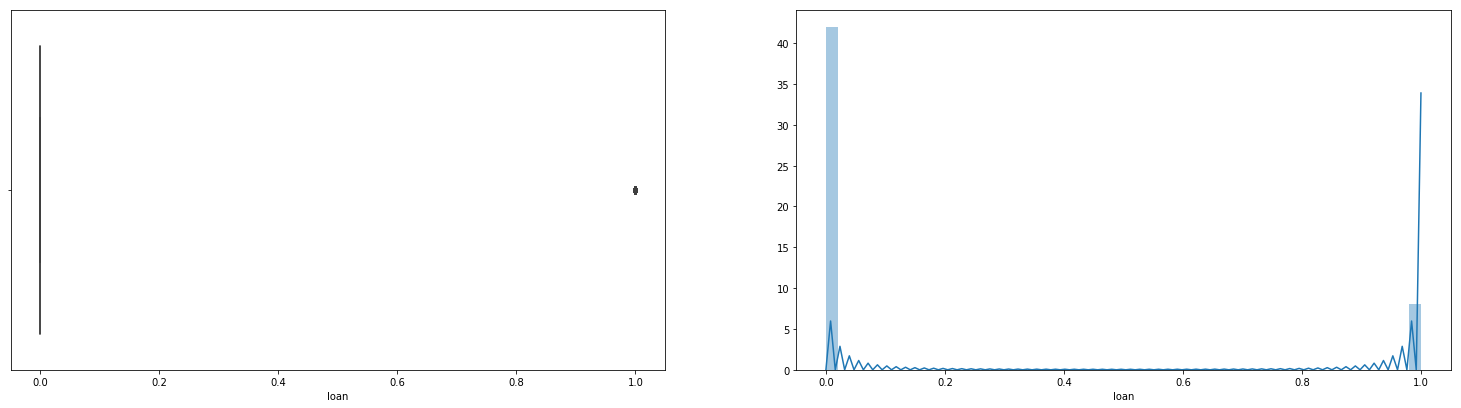

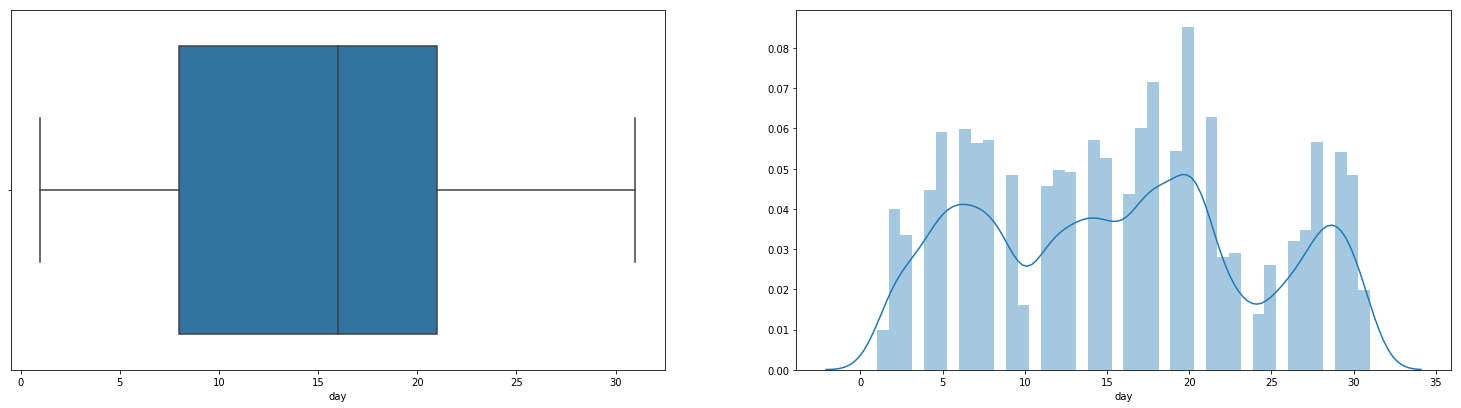

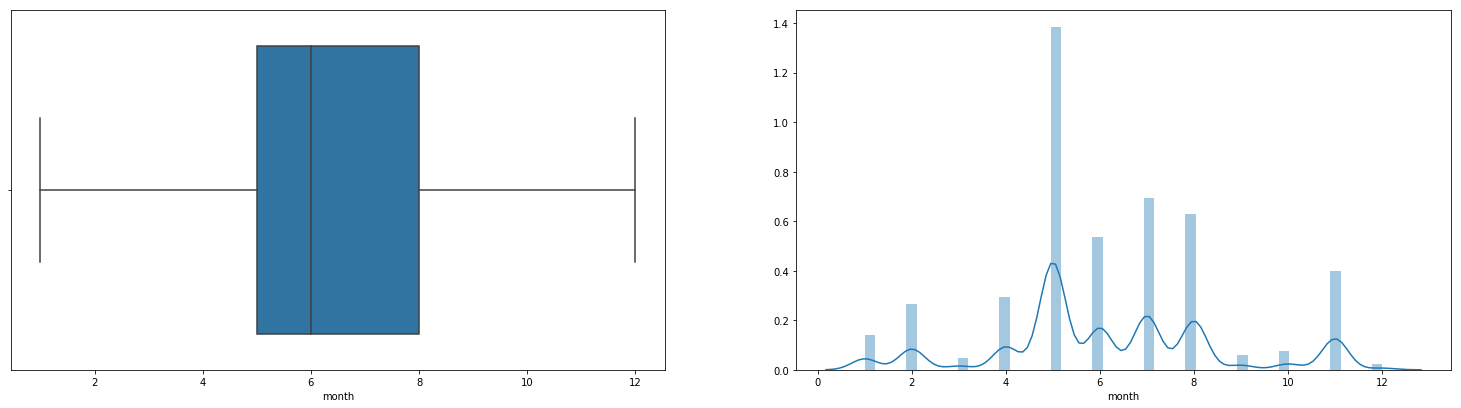

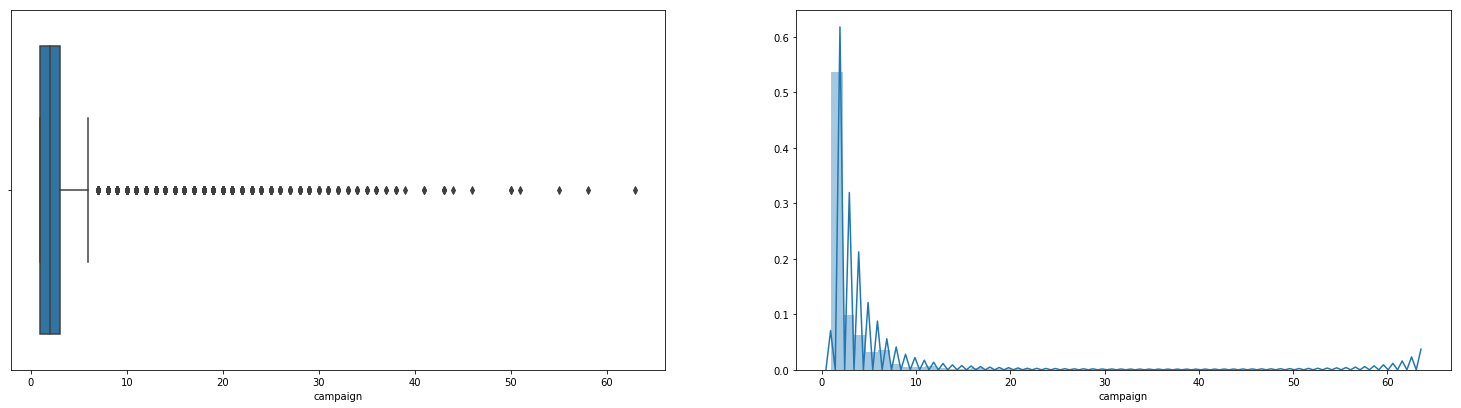

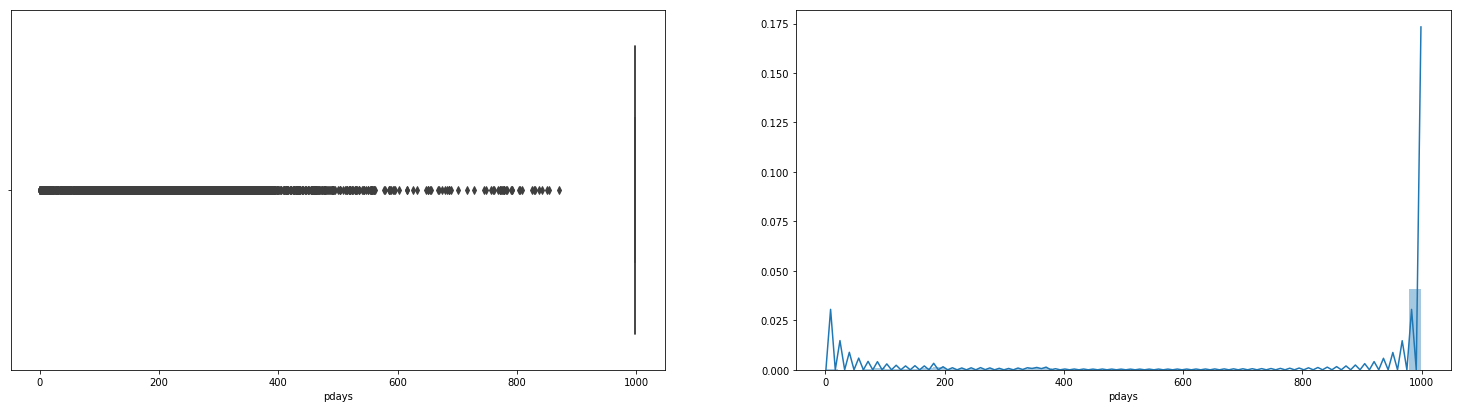

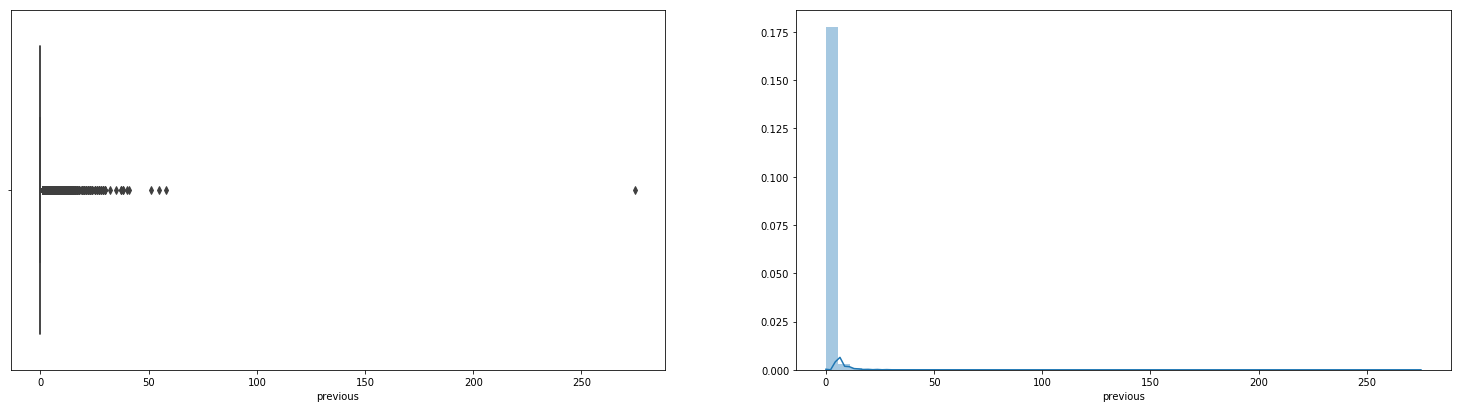

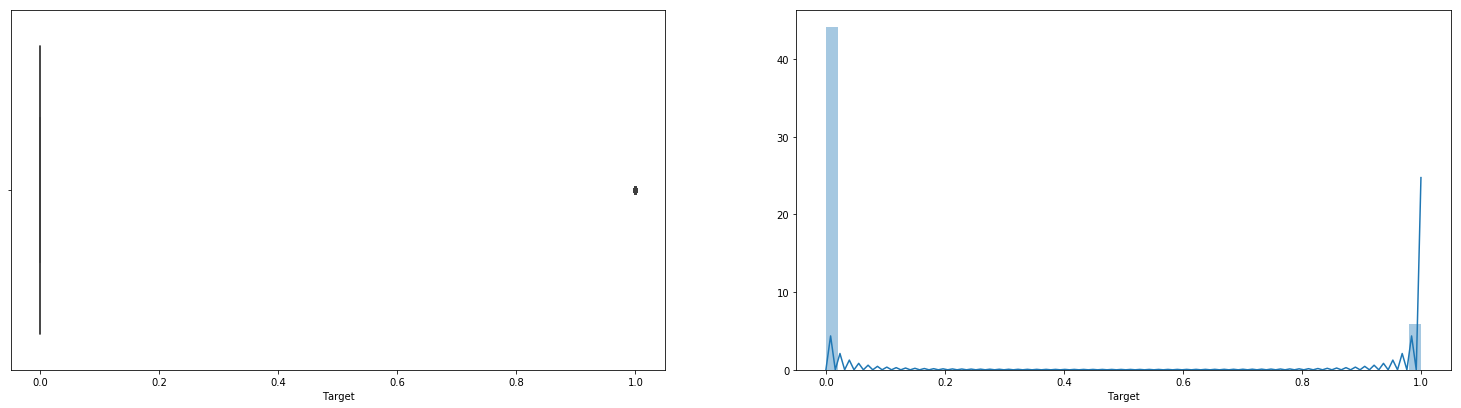

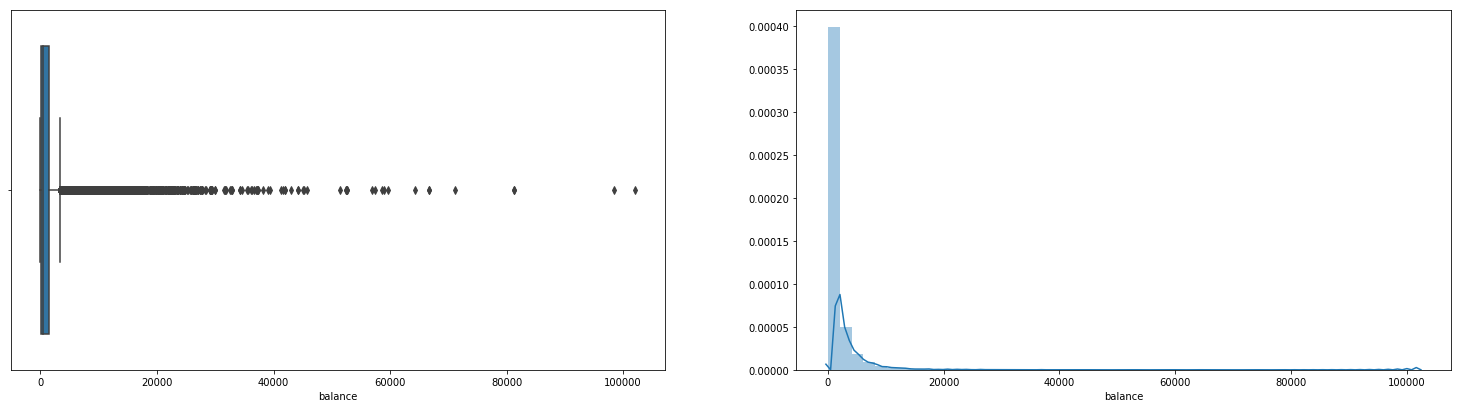

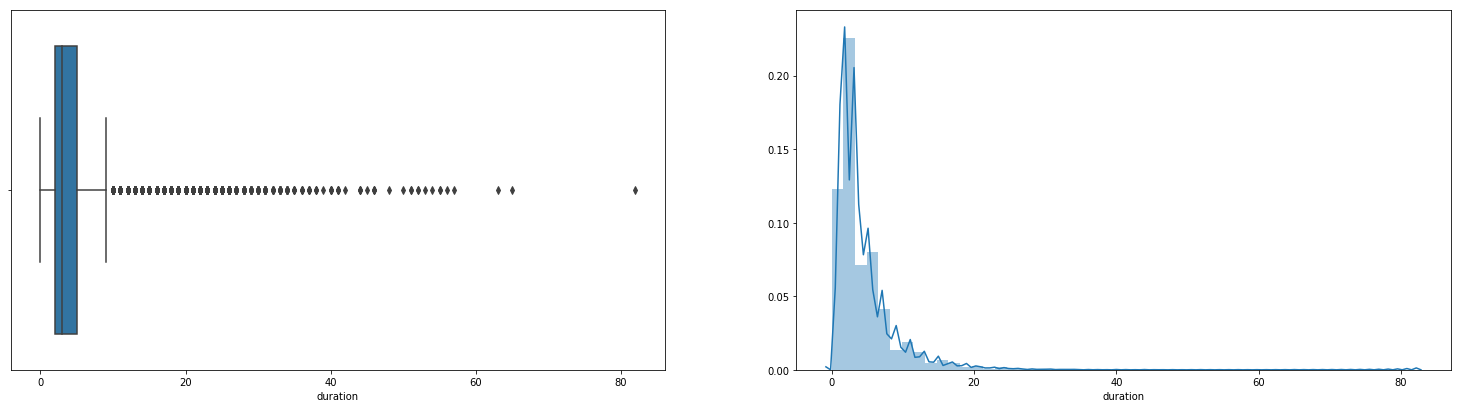

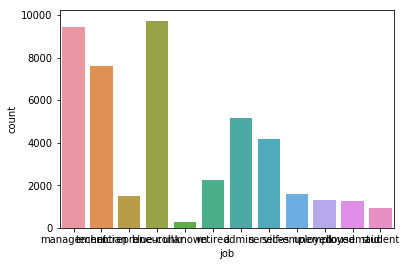

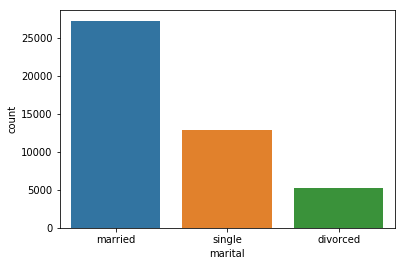

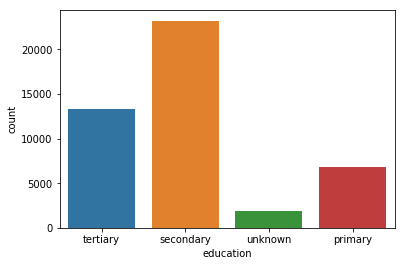

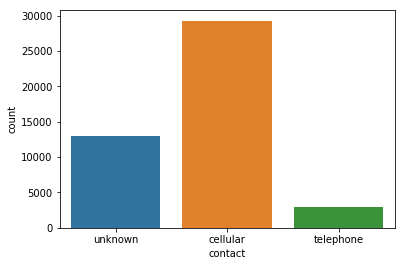

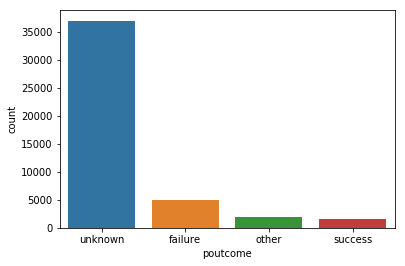

In [15]:
Perform_EDA.univariate_plots(df)

Obseration: 
1. Age is having good distrbution of data and bit left skewed.
2. Default people having no default.
3.  higher number of people havng housing loan.
4.  less number of customer having less perosonal loan.
5.  Mid month from days 17-20 done more calls.
6.  May is having highest number of calls.
7.  Range from 5-7 contact time is highest.
8.  Data is skewed towards no deposit.

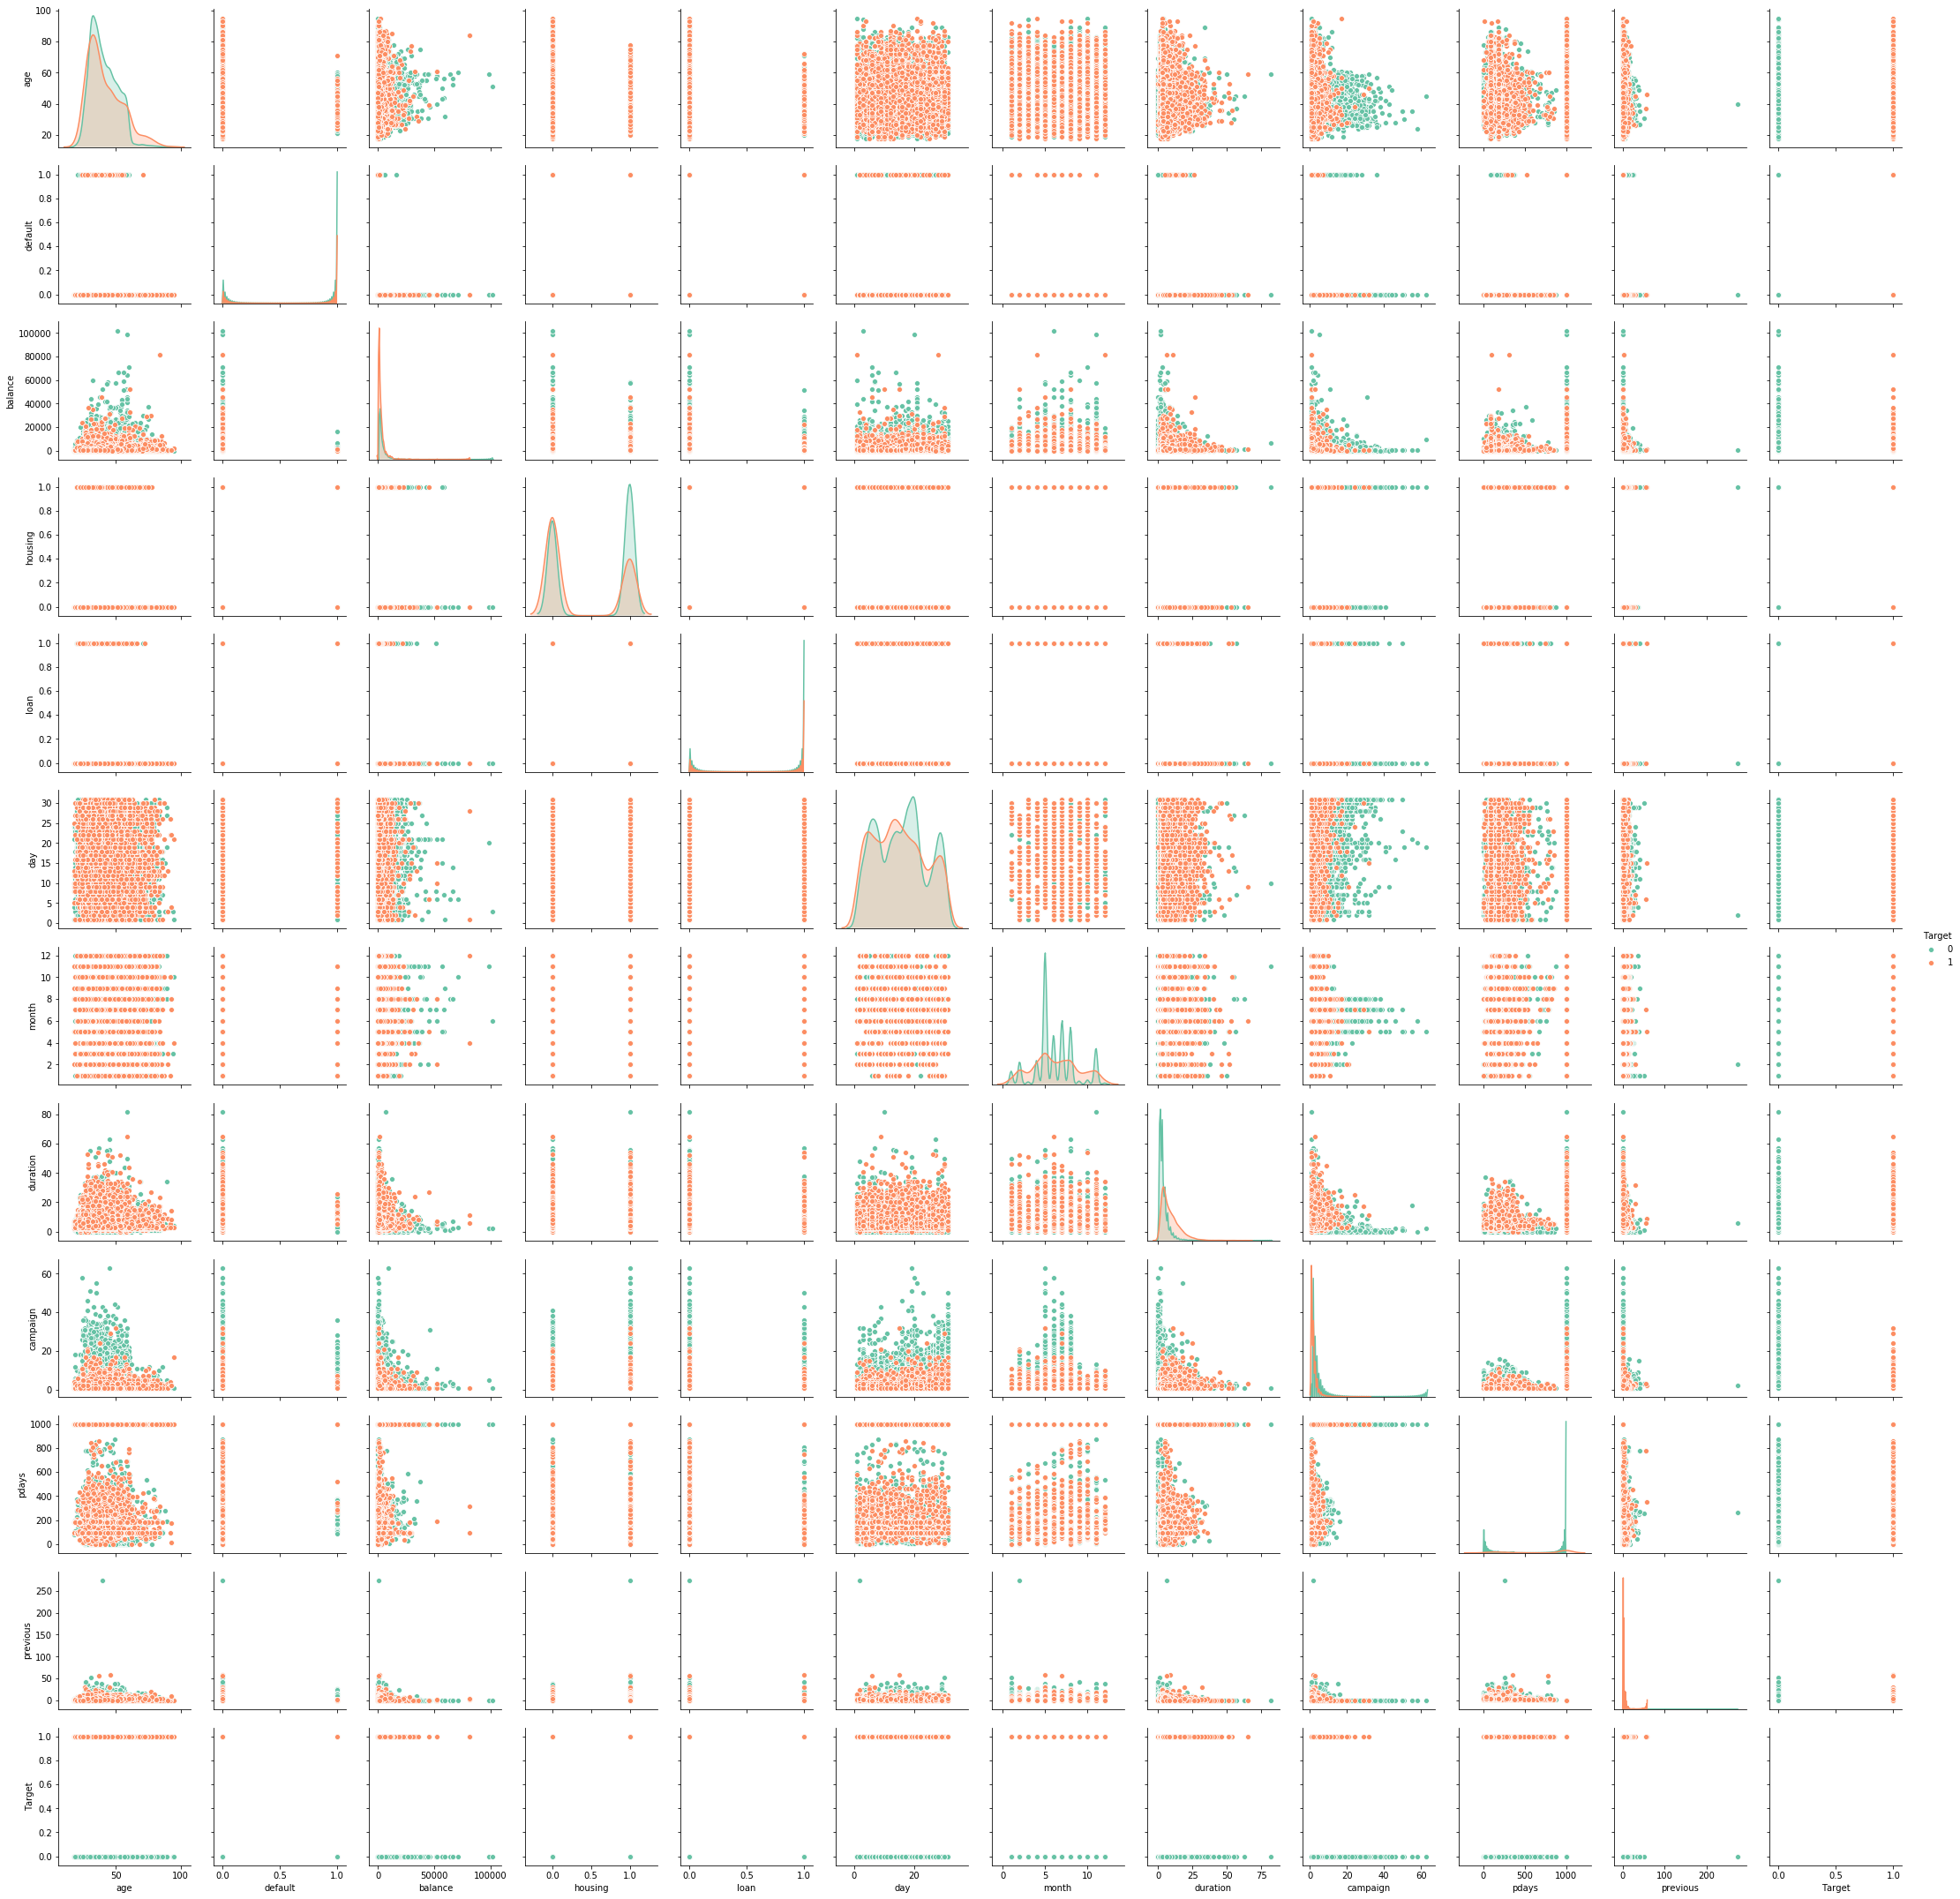

In [16]:
sns.pairplot(df, hue='Target', palette="Set2", height=2.5)

1.There is no spacicifc age who will deposit or not.

2. People with higher balance tend to have more deposit.

3. people having housing loan/personal  loan tend have less term deposit.

4. less campaingn time around 5 min tend to have more probablity to successful term deposit.

In [17]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,0,2143.0,1,0,unknown,5,5,4.0,1,999,0,unknown,0
1,44,technician,single,secondary,0,29.0,1,0,unknown,5,5,3.0,1,999,0,unknown,0
2,33,entrepreneur,married,secondary,0,2.0,1,1,unknown,5,5,1.0,1,999,0,unknown,0
3,47,blue-collar,married,unknown,0,1506.0,1,0,unknown,5,5,2.0,1,999,0,unknown,0
4,33,unknown,single,unknown,0,1.0,0,0,unknown,5,5,3.0,1,999,0,unknown,0


,Feature,Uniqueness,Positive rel,inverse rel,Pos,Neg,No
0,age,11,1,0,[age],[],"[default, balance, housing, loan, day, month, ..."
1,default,11,1,0,[default],[],"[age, balance, housing, loan, day, month, dura..."
2,balance,11,1,0,[balance],[],"[age, default, housing, loan, day, month, dura..."
3,housing,11,1,0,[housing],[],"[age, default, balance, loan, day, month, dura..."
4,loan,11,1,0,[loan],[],"[age, default, balance, housing, day, month, d..."
5,day,11,1,0,[day],[],"[age, default, balance, housing, loan, month, ..."
6,month,11,1,0,[month],[],"[age, default, balance, housing, loan, day, du..."
7,duration,11,1,0,[duration],[],"[age, default, balance, housing, loan, day, mo..."
8,campaign,11,1,0,[campaign],[],"[age, default, balance, housing, loan, day, mo..."
9,pdays,11,1,1,[pdays],[previous],"[age, default, balance, housing, loan, day, mo..."


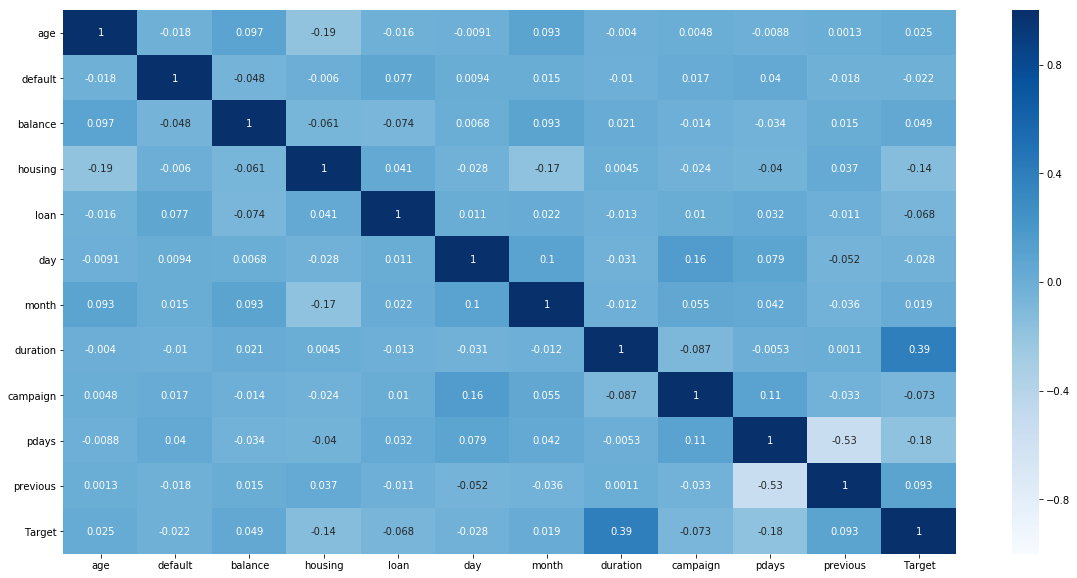

In [18]:
Perform_EDA.EDA_Corr(df)

#Duration having some postive co-relation with Target
#pdays and previous having negative co-relation

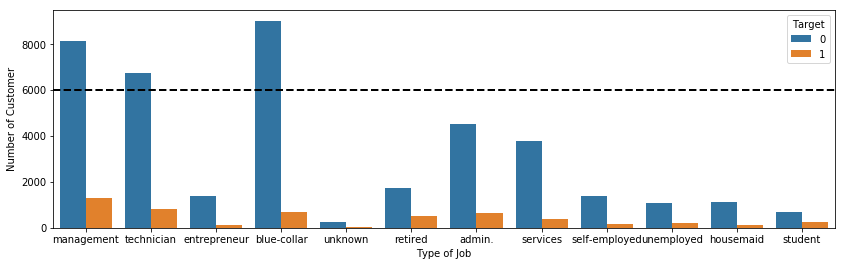

In [19]:
plt.figure(figsize=[14,4])

sns.countplot(data=df,x='job',hue='Target')


plt.ylabel('Number of Customer')
plt.xlabel('Type of Job')
plt.axhline(y=6000, linewidth=2, color="k", linestyle='--')
#Managment,technician and blue-collar having number of custoemr and success rate is high amoung them

Text(21, 2800, 'Higher No. call made day of month is 17-21')

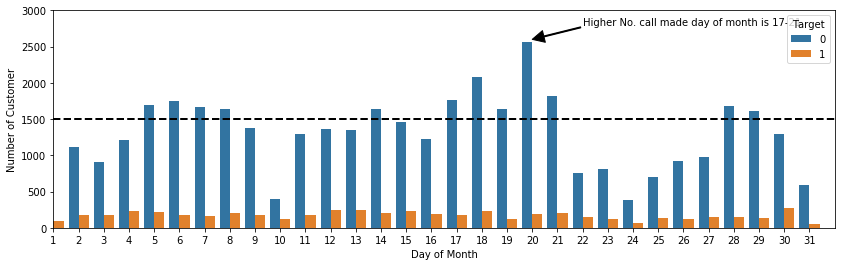

In [20]:
plt.figure(figsize=[14,4])

sns.countplot(data=df,x='day',hue='Target')
plt.axis([0,31,0,3000])
plt.ylabel('Number of Customer')
plt.xlabel('Day of Month')
plt.axhline(y=1500, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher No. call made day of month is 17-21',xytext = (21,2800),
             arrowprops=dict(color = 'k', width=1),xy=(19,2600))
#Most of calls are made during month of days are 17-21

Text(7, 8000, 'Highest successful call made during month of May')

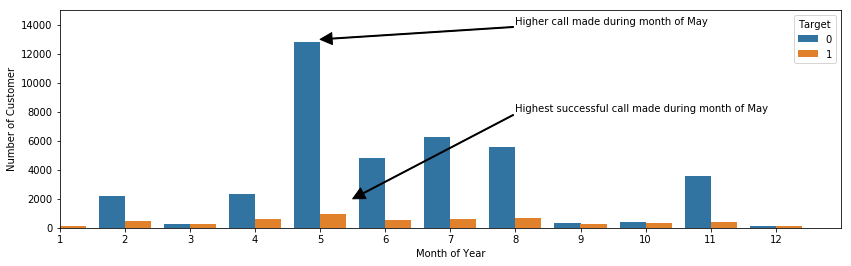

In [21]:
plt.figure(figsize=[14,4])
sns.countplot(x='month', hue='Target', data=df)
plt.axis([0,12,0,15000])
plt.ylabel('Number of Customer')
plt.xlabel('Month of Year')
#plt.axhline(y=1200, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher call made during month of May',xytext = (7,14000),
             arrowprops=dict(color = 'k', width=1),xy=(4,13000))
plt.annotate('Highest successful call made during month of May',xytext = (7,8000),
             arrowprops=dict(color = 'k', width=1),xy=(4.5,2000))
#higest calls are made during month of may and highest sucessful call also made during this time.

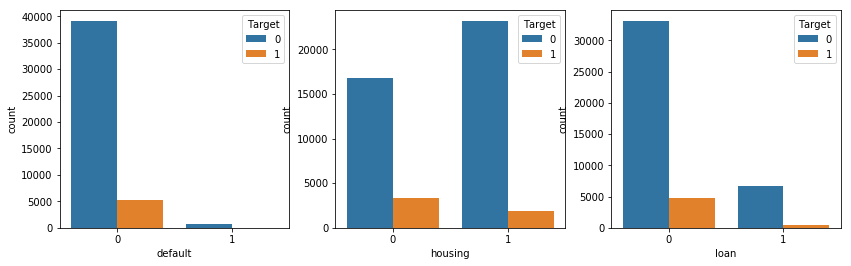

In [22]:
plt.figure(figsize=[14,4])
plt.subplot(1,3,1)
sns.countplot(x='default', hue='Target', data=df)
plt.subplot(1,3,2)
sns.countplot(x='housing', hue='Target', data=df)
plt.subplot(1,3,3)
sns.countplot(x='loan', hue='Target', data=df)
plt.show()

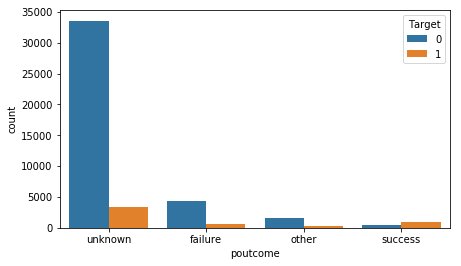

In [23]:
plt.figure(figsize=[7,4])

sns.countplot(x='poutcome', hue='Target', data=df)


Text(35, 15, 'Higher success rate when calls less then eqal to 7 minutes')

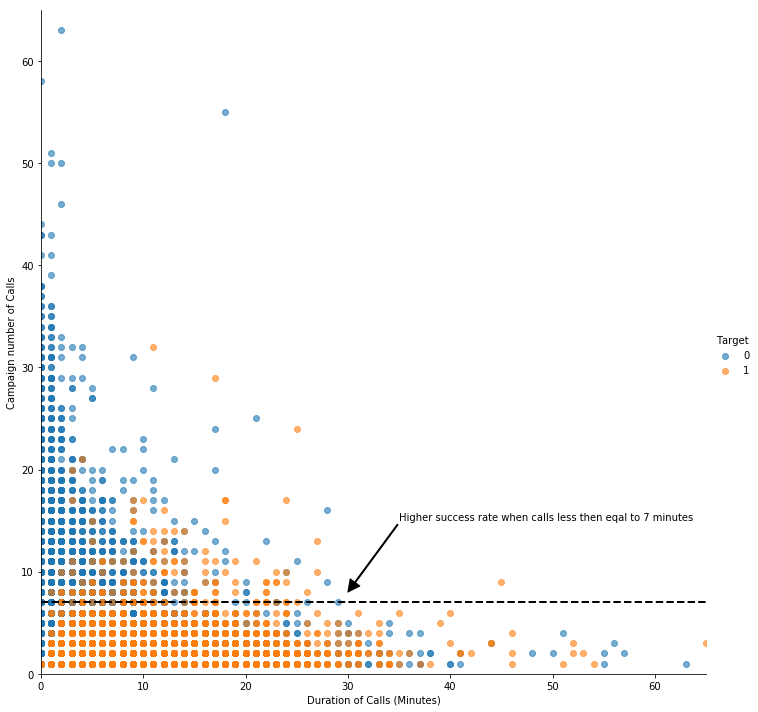

In [132]:
sns.lmplot(x='duration',y='campaign',hue='Target',data=df,size=10,fit_reg = False,scatter_kws={'alpha':0.6}, height =7)
plt.axis([0,65,0,65])
plt.ylabel('Campaign number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.axhline(y=7, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher success rate when calls less then eqal to 7 minutes',xytext = (35,15),
             arrowprops=dict(color = 'k', width=1),xy=(30,8))


#Higher success rate when calls less then eqal to 7 minutes

In [149]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,0,2143.0,1,0,unknown,5,5,4.0,1,999,0,unknown,0
1,44,technician,single,secondary,0,29.0,1,0,unknown,5,5,3.0,1,999,0,unknown,0
2,33,entrepreneur,married,secondary,0,2.0,1,1,unknown,5,5,1.0,1,999,0,unknown,0
3,47,blue-collar,married,unknown,0,1506.0,1,0,unknown,5,5,2.0,1,999,0,unknown,0
4,33,unknown,single,unknown,0,1.0,0,0,unknown,5,5,3.0,1,999,0,unknown,0


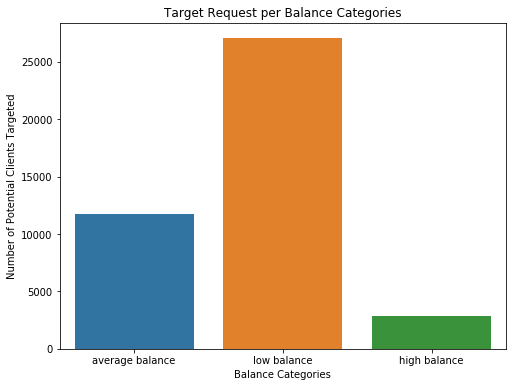

In [152]:
df['balance_categories'] = np.nan

lst = [df]

for column in lst:
    column.loc[(column['balance'] > 0) & (column['balance'] <= 1000), 'balance_categories'] = 'low balance'
    column.loc[(column['balance'] > 1000) & (column['balance'] <= 5000), 'balance_categories'] = 'average balance'
    column.loc[column['balance'] > 5000, 'balance_categories'] = 'high balance'
    
df.head()
df['balance_categories'].value_counts()
fig, ax = plt.subplots(figsize=(8,6))
g = sns.countplot(x="balance_categories", data=df)

plt.title("Target Request per Balance Categories")
plt.xlabel('Balance Categories')
plt.ylabel("Number of Potential Clients Targeted")

plt.show()

There is high number of customer having low balance.

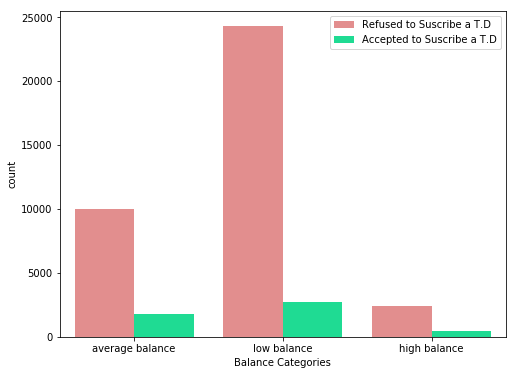

In [155]:
fig, ax = plt.subplots(figsize=(8,6))
g = sns.countplot(x="balance_categories", data=df, hue='Target', palette={0:'#F08080', 1:'#00FA9A'})

legend_name = plt.legend()
legend_name.get_texts()[0].set_text('Refused to Suscribe a T.D')
legend_name.get_texts()[1].set_text('Accepted to Suscribe a T.D')
plt.xlabel('Balance Categories')


plt.show()


high balance customer having higer term deposit rate.

In [25]:
# Add relation with balance

In [26]:
#table = pd.pivot_table(df, values='Target', index=['job', 'loan'],columns=['month'], aggfunc=np.sum)
#table

Preprocessing: Dividine ages into buckts

In [156]:
df.loc[df['age'] <= 32, 'age'] = 1
df.loc[(df['age'] > 32) & (df['age'] <= 47), 'age'] = 2
df.loc[(df['age'] > 47) & (df['age'] <= 70), 'age'] = 3
df.loc[(df['age'] > 70) & (df['age'] <= 98), 'age'] = 4

In [157]:
## transforming categorical variable to numeric 
from sklearn.preprocessing import LabelEncoder
catg_clmn = ['job','marital','education','contact','poutcome']
for col in catg_clmn :
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,balance_categories
0,3,4,1,2,0,2143.0,1,0,2,5,5,4.0,1,999,0,3,0,average balance
1,2,9,2,1,0,29.0,1,0,2,5,5,3.0,1,999,0,3,0,low balance
2,2,2,1,1,0,2.0,1,1,2,5,5,1.0,1,999,0,3,0,low balance
3,2,1,1,3,0,1506.0,1,0,2,5,5,2.0,1,999,0,3,0,average balance
4,2,11,2,3,0,1.0,0,0,2,5,5,3.0,1,999,0,3,0,low balance


# Dividing test and train data set

In [29]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [30]:
Y=df['Target']

In [31]:
X_pre=df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']]

In [32]:
from scipy.stats import zscore
X=X_pre.apply(zscore)

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=100)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X_pre, Y, test_size=.3, random_state=100)

In [34]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
18391,-0.046709,-1.020516,-0.275762,-0.300556,-0.13549,1.136676,-1.118674,-0.436803,-0.713012,1.825628,0.355209,-0.068866,-0.246560,0.466408,-0.251940,0.444898
13056,-1.399549,-1.326082,1.368372,-0.300556,-0.13549,-0.324408,-1.118674,2.289359,-0.713012,-0.938003,0.355209,-0.300957,-0.569351,0.466408,-0.251940,0.444898
13415,1.306130,1.424008,-0.275762,1.036362,-0.13549,0.668002,0.893915,-0.436803,-0.713012,-0.817845,0.355209,-0.300957,-0.569351,0.466408,-0.251940,0.444898
21022,-0.046709,-0.103820,1.368372,1.036362,-0.13549,-0.251436,-1.118674,-0.436803,-0.713012,-0.217055,0.770490,0.163225,-0.246560,0.466408,-0.251940,0.444898
24510,1.306130,-0.103820,-0.275762,1.036362,-0.13549,-0.197703,-1.118674,-0.436803,-0.713012,0.143418,2.016333,-0.765139,-0.569351,-2.372905,0.616335,-2.588321


In [35]:
Y_train.head()

18391    0
13056    0
13415    0
21022    0
24510    0
Name: Target, dtype: int64

# Logistic Classfier

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11985
           1       0.61      0.29      0.39      1579

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.76      0.63      0.67     13564
weighted avg       0.88      0.90      0.88     13564

confusion matrix as below
[[11689   296]
 [ 1125   454]]


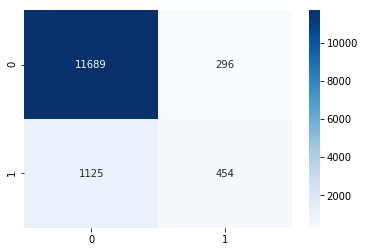

In [36]:
logmodel = LogisticRegression()
Logistic_Reg_Model = logmodel.fit(X_train,Y_train)
Logistic_Reg_Model
predictions = Logistic_Reg_Model.predict(X_test)

print(classification_report(Y_test,predictions))
print("confusion matrix as below")
print(confusion_matrix(Y_test,predictions))
sns.heatmap(confusion_matrix(Y_test,predictions), annot=True, cmap='Blues',fmt='g')


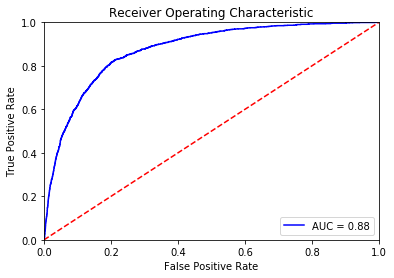

In [38]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = Logistic_Reg_Model.predict_proba(X_test)
preds = probs[:,1]
fpr_log, tpr_log, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr_log, tpr_log)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_log, tpr_log, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [39]:

Logistic_Accuracy = accuracy_score(Y_test,predictions)
print("Logistic_Accuracy : ", Logistic_Accuracy)
Logistic_Gini = 2*roc_auc - 1
print("Logistic_Gini : ",Logistic_Gini)
Logistic_AUC = roc_auc
print("Logistic_AUC: ", Logistic_AUC)

Logistic_Accuracy :  0.8952373930993807
Logistic_Gini :  0.7502650954605226
Logistic_AUC:  0.8751325477302613


# Naive Classifier

              precision    recall  f1-score   support

           0       0.93      0.87      0.90     11985
           1       0.34      0.53      0.42      1579

   micro avg       0.83      0.83      0.83     13564
   macro avg       0.64      0.70      0.66     13564
weighted avg       0.86      0.83      0.84     13564



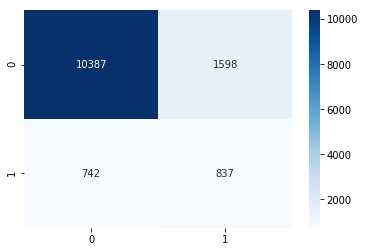

In [40]:
Naive = GaussianNB()
Naive_model = Naive.fit(X_train,Y_train)
Naive_model
Naive_predictions = Naive_model.predict(X_test)
Naive_predictions

print(classification_report(Y_test,Naive_predictions))
sns.heatmap(confusion_matrix(Y_test,Naive_predictions), annot=True, cmap='Blues',fmt='g')


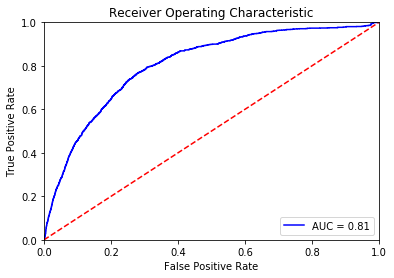

In [41]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = Naive_model.predict_proba(X_test)
preds = probs[:,1]
fpr_nai, tpr_nai, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr_nai, tpr_nai)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_nai, tpr_nai, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [42]:
Naive_Accuracy = accuracy_score(Y_test,Naive_predictions)
print("Naive_Accuracy : ", Naive_Accuracy)
Naive_Accuracy
Naive_Gini = 2*roc_auc - 1
print("Naive_Gini : ", Naive_Gini)
Naive_AUC = roc_auc
print("Naive_AUC : ", Naive_AUC)

Naive_Accuracy :  0.8274845178413447
Naive_Gini :  0.610578876963314
Naive_AUC :  0.805289438481657



# KNN Classifier

In [43]:
KNN = KNeighborsClassifier()
KNN_model = KNN.fit(X_train,Y_train)
KNN_predictions = KNN_model.predict(X_test)
KNN_predictions
N = [3,5,7,9,11,13,15,17,19,21,23,25,27,29]
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in N:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(Y_test, y_pred)
    ac_scores.append(scores)

In [44]:
pandas.DataFrame(ac_scores,N)

,0
3,0.887717
5,0.892436
7,0.894574
9,0.894279
11,0.893837
13,0.893026
15,0.893689
17,0.894795
19,0.896270
21,0.895680


In [45]:
Dist = [1,2]
ac_scores = []


for k in Dist:
    knn = KNeighborsClassifier(n_neighbors=17,p=k)
    knn.fit(X_train, Y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(Y_test, y_pred)
    ac_scores.append(scores)


In [46]:
pandas.DataFrame(ac_scores,Dist)

,0
1,0.897302
2,0.894795


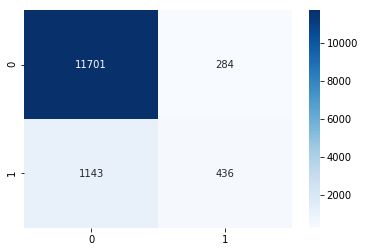

In [47]:

KNN = KNeighborsClassifier(n_neighbors=17,p=2)
KNN_model = KNN.fit(X_train,Y_train)
KNN_predictions = KNN_model.predict(X_test)
KNN_predictions
sns.heatmap(confusion_matrix(Y_test,KNN_predictions), annot=True, cmap='Blues',fmt='g')

In [48]:
print(classification_report(Y_test,KNN_predictions))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11985
           1       0.61      0.28      0.38      1579

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.76      0.63      0.66     13564
weighted avg       0.88      0.89      0.88     13564



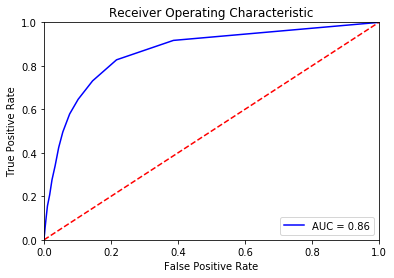

In [49]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = KNN_model.predict_proba(X_test)
preds = probs[:,1]
fpr_knn, tpr_knn, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr_knn, tpr_knn)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_knn, tpr_knn, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [50]:
KNN_Accuracy = accuracy_score(Y_test,KNN_predictions)
print("KNN_Accuracy :", KNN_Accuracy)
KNN_Gini = 2*roc_auc - 1
print("KNN_Gini :", KNN_Gini)
KNN_AUC = roc_auc
print("KNN_AUC :", KNN_AUC)

KNN_Accuracy : 0.8947950457092303
KNN_Gini : 0.7294535627841747
KNN_AUC : 0.8647267813920874


# Support Vector using RBF kernal

In [51]:
SVM_Model = svm.SVC(kernel = 'rbf', C = 100, probability=True)
SVM_Model.fit(X_train,Y_train)
SVM_Predictions = SVM_Model.predict(X_test)
SVM_Predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
print(classification_report(Y_test,SVM_Predictions))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11985
           1       0.56      0.40      0.47      1579

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.74      0.68      0.70     13564
weighted avg       0.88      0.89      0.89     13564



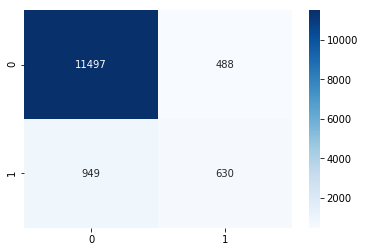

In [53]:
sns.heatmap(confusion_matrix(Y_test,SVM_Predictions), annot=True, cmap='Blues',fmt='g')

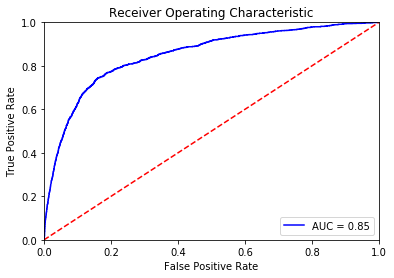

In [55]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = SVM_Model.predict_proba(X_test)
preds = probs[:,1]
fpr_svm, tpr_svm, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr_svm, tpr_svm)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_svm, tpr_svm, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [56]:
SVM_Accuracy_RBF = accuracy_score(Y_test,SVM_Predictions)
print("SVM_Accuracy_RBF :",SVM_Accuracy_RBF)
SVM_Gini_RBF = 2*roc_auc - 1
print("SVM_Gini_RBF :",SVM_Gini_RBF)
SVM_AUC_RBF = roc_auc
print("SVM_AUC_RBF :",SVM_AUC_RBF)

SVM_Accuracy_RBF : 0.8940578000589796
SVM_Gini_RBF : 0.7019278108613178
SVM_AUC_RBF : 0.8509639054306589


In [57]:
Compare = [[Logistic_Accuracy,Logistic_Gini,Logistic_AUC],
           [Naive_Accuracy,Naive_Gini,Naive_AUC],[KNN_Accuracy,KNN_Gini,KNN_AUC],
            [SVM_Accuracy_RBF,SVM_Gini_RBF,SVM_AUC_RBF]]

In [58]:
Compare_Models = pandas.DataFrame(Compare, columns= ['Accuracy','Gini Index', 'AUC'], index=['Logistic','Naive','KNN','SVM_RBF'])
Compare_Models

,Accuracy,Gini Index,AUC
Logistic,0.895237,0.750265,0.875133
Naive,0.827485,0.610579,0.805289
KNN,0.894795,0.729454,0.864727
SVM_RBF,0.894058,0.701928,0.850964


Observation:

Logistic reg having highest acuracy rate of 89.5% .which outperform all three also.

Gini Index is highest of 75%.

AUC is 87.5% highest amount all model.

Local Conclusion : logistic is performing best amount all 4 algo, 

i was expecting SVM to perform bettter then other algo as per my previous experience. 

# Decision Tree Model

In [59]:
train_char_label = ['No', 'Yes']
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, Y_train)
from sklearn import tree
Credit_Tree = open('Credit_Tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                Imp
age        0.028412
job        0.053728
marital    0.022406
education  0.032733
default    0.000508
balance    0.141958
housing    0.026276
loan       0.010389
contact    0.041639
day        0.120642
month      0.103510
duration   0.225164
campaign   0.043651
pdays      0.086844
previous   0.014183
poutcome   0.047958


In [60]:
y_predict = dt_model.predict(X_test)
print(dt_model.score(X_train , Y_train))
print(dt_model.score(X_test , Y_test))

1.0
0.8740784429371866


In [61]:
import matplotlib.pyplot as matplot
import itertools
def plot_confusion_matrix(Y_test,Y_predict, target_names,title='Confusion matrix',cmap=None,normalize=True):
    cm = metrics.confusion_matrix(Y_test, Y_predict)
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = matplot.get_cmap('Blues')

    matplot.figure(figsize=(8, 6))
    matplot.imshow(cm, interpolation='nearest', cmap=cmap)
    matplot.title(title)
    matplot.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        matplot.xticks(tick_marks, target_names, rotation=45)
        matplot.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            matplot.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            matplot.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    matplot.tight_layout()
    matplot.ylabel('True label')
    matplot.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    matplot.show()
    print(metrics.classification_report(Y_test, Y_predict))
    model_performance = [metrics.accuracy_score(Y_test, Y_predict),metrics.recall_score(Y_test, Y_predict),
                         metrics.precision_score(Y_test, Y_predict),metrics.f1_score(Y_test, Y_predict) ]
    accuracy_report = pd.DataFrame(model_performance, columns=['Model_Performance'],
                                   index=['Accuracy','Recall','Precision','f1_Score'])
    return accuracy_report

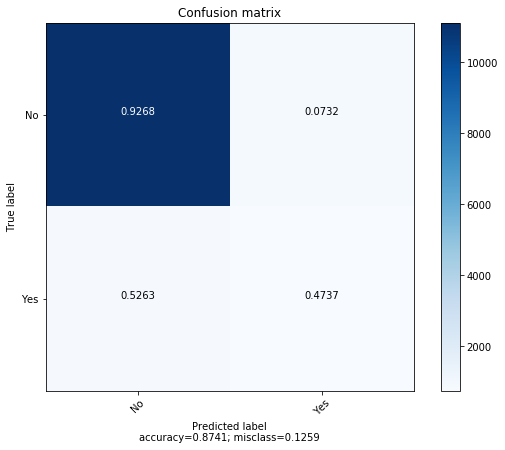

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11985
           1       0.46      0.47      0.47      1579

   micro avg       0.87      0.87      0.87     13564
   macro avg       0.70      0.70      0.70     13564
weighted avg       0.88      0.87      0.87     13564



,Model_Performance
Accuracy,0.874078
Recall,0.473718
Precision,0.460308
f1_Score,0.466916


In [62]:
plot_confusion_matrix(Y_test,y_predict, target_names=train_char_label,title='Confusion matrix',cmap=None,normalize=True)

In [63]:
DT_Predictions = dt_model.predict(X_test)
DT_Predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

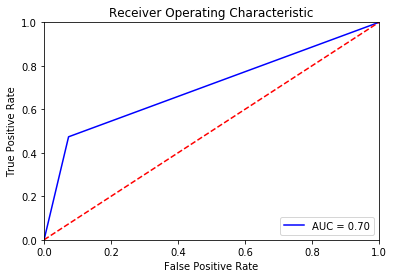

In [64]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = dt_model.predict_proba(X_test)
preds = probs[:,1]
fpr_dt, tpr_dt, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr_dt, tpr_dt)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_dt, tpr_dt, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [65]:
DT_Predictions_Accuracy = accuracy_score(Y_test,DT_Predictions)
print("SVM_Accuracy_RBF :",DT_Predictions_Accuracy)
DT_Predictions_Gini = 2*roc_auc - 1
print("SVM_Gini_RBF :",DT_Predictions_Gini)
DT_Predictions_auc=roc_auc
print("SVM_AUC_RBF :",DT_Predictions_auc)

SVM_Accuracy_RBF : 0.8740784429371866
SVM_Gini_RBF : 0.40054274091294717
SVM_AUC_RBF : 0.7002713704564736


In [66]:
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
reg_dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [67]:
Credit_Tree_Reg = open('Credit_Tree_Reg.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file=Credit_Tree_Reg, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                Imp
age        0.028412
job        0.053728
marital    0.022406
education  0.032733
default    0.000508
balance    0.141958
housing    0.026276
loan       0.010389
contact    0.041639
day        0.120642
month      0.103510
duration   0.225164
campaign   0.043651
pdays      0.086844
previous   0.014183
poutcome   0.047958


In [68]:
y_predict = reg_dt_model.predict(X_test)
reg_dt_model.score(X_test , Y_test)

0.897817752875258

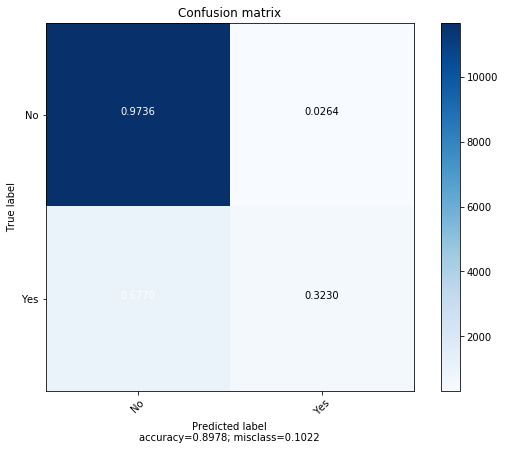

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11985
           1       0.62      0.32      0.42      1579

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.77      0.65      0.68     13564
weighted avg       0.88      0.90      0.88     13564



,Model_Performance
Accuracy,0.897818
Recall,0.322989
Precision,0.616687
f1_Score,0.423940


In [69]:
plot_confusion_matrix(Y_test,y_predict, target_names=train_char_label,title='Confusion matrix',cmap=None,normalize=True)

In [70]:
DT_Predictions = reg_dt_model.predict(X_test)
DT_Predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

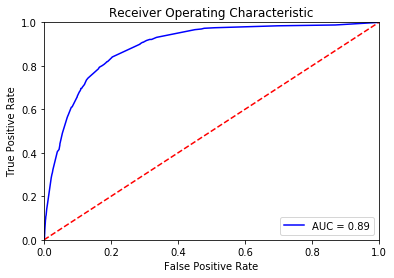

In [71]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = reg_dt_model.predict_proba(X_test)
preds = probs[:,1]
fpr_dt_reg, tpr_tt_reg, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr_dt_reg, tpr_tt_reg)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_dt_reg, tpr_tt_reg, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [72]:
DT_Predictions_Accuracy_reg = accuracy_score(Y_test,DT_Predictions)
print("DT_Predictions_Accuracy_reg :",DT_Predictions_Accuracy_reg)
DT_Predictions_Gini_reg = 2*roc_auc - 1
print("DT_Predictions_Gini_reg :",DT_Predictions_Gini_reg)
DT_Predictions_auc_reg=roc_auc
print("DT_Predictions_auc_reg :",DT_Predictions_auc_reg)

DT_Predictions_Accuracy_reg : 0.897817752875258
DT_Predictions_Gini_reg : 0.7787609749679181
DT_Predictions_auc_reg : 0.889380487483959


In [73]:
RandomState = np.random.seed(1234)
Test_reg_scores = []
max_depth = []
for i in range(1,20,2):    
    Test_reg_param = DecisionTreeClassifier(criterion = 'entropy', max_depth = i, random_state=RandomState )
    Test_reg_param.fit(X_train, Y_train)
    Y_predict_Test_reg = Test_reg_param.predict(X_test)
    scores = Test_reg_param.score(X_test, Y_test)
    Test_reg_scores.append(scores)
    max_depth.append(i)

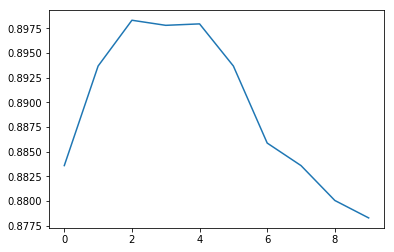

In [74]:
matplot.plot(Test_reg_scores)

In [75]:
pd.concat([pd.DataFrame(Test_reg_scores, columns = ['Scores']),
               pd.DataFrame(max_depth, columns = ['max_depth'])], axis = 1)

,Scores,max_depth
0,0.883589,1
1,0.893689,3
2,0.898334,5
3,0.897818,7
4,0.897965,9
5,0.893689,11
6,0.885874,13
7,0.883589,15
8,0.880050,17
9,0.878281,19


# Random Forest classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier

,Scores,n_estimators
0,0.903347,50
1,0.903642,75
2,0.903273,100
3,0.904674,125
4,0.904969,150
5,0.904158,175
6,0.905411,200
7,0.904306,225
8,0.904674,250
9,0.905116,275


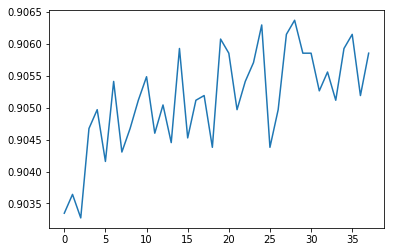

In [77]:
Test_reg_scores = []
n_estimators = []
for i in range(50,1000,25):
    Test_rfcl = RandomForestClassifier(n_estimators = i, random_state=RandomState)
    Test_rfcl = Test_rfcl.fit(X_train, Y_train)
    Test_Y_predict_rfcl = Test_rfcl.predict(X_test)
    scores = Test_rfcl.score(X_test, Y_test)
    Test_reg_scores.append(scores)
    n_estimators.append(i)
            
matplot.plot(Test_reg_scores)

pd.concat([pd.DataFrame(Test_reg_scores, columns = ['Scores']),
               pd.DataFrame(n_estimators, columns = ['n_estimators'])], axis = 1)

1.0
0.9046004128575641


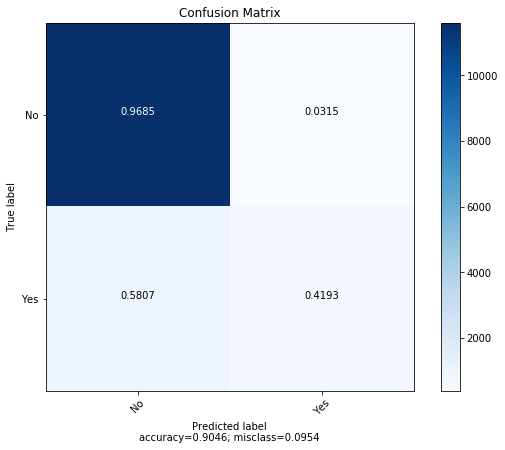

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11985
           1       0.64      0.42      0.51      1579

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.78      0.69      0.73     13564
weighted avg       0.89      0.90      0.90     13564



,Model_Performance
Accuracy,0.904600
Recall,0.419253
Precision,0.637151
f1_Score,0.505730


In [78]:
rfcl = RandomForestClassifier(n_estimators = 450 , random_state=RandomState)
rfcl = rfcl.fit(X_train, Y_train)
Y_predict_rfcl = rfcl.predict(X_test)
print(rfcl.score(X_train , Y_train))
print(rfcl.score(X_test, Y_test))
plot_confusion_matrix(Y_test, Y_predict_rfcl, train_char_label,title = "Confusion Matrix", cmap = None, normalize= True)

In [79]:
rfcl_predictions = rfcl.predict(X_test)
rfcl_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

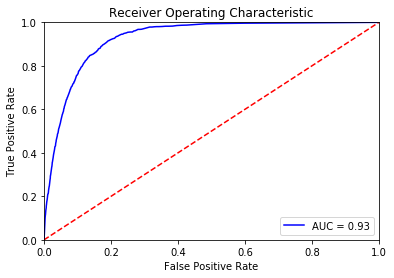

In [80]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = rfcl.predict_proba(X_test)
preds = probs[:,1]
fpr_rf, tpr_rf, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr_rf, tpr_rf)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_rf, tpr_rf, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [81]:
rfcl_Accuracy = accuracy_score(Y_test,Y_predict_rfcl)
print("rfcl_Accuracy :",rfcl_Accuracy)
rfcl_Gini = 2*roc_auc - 1
print("rfcl_Gini :",rfcl_Gini)
rfcl_AUC = roc_auc
print("rfcl_AUC :",rfcl_AUC)

rfcl_Accuracy : 0.9046004128575641
rfcl_Gini : 0.85367195589378
rfcl_AUC : 0.92683597794689


# Ensemble Learning - Bagging

In [82]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=100)

#bgcl = BaggingClassifier(n_estimators=50)
bgcl = bgcl.fit(X_train, Y_train)

In [83]:
y_predict_bgcl = bgcl.predict(X_test)
y_predict_bgcl

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

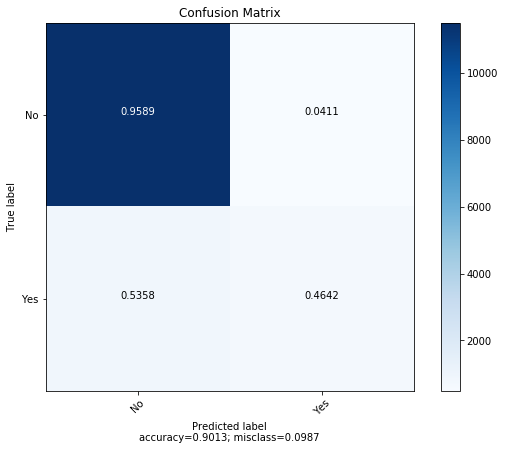

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     11985
           1       0.60      0.46      0.52      1579

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.76      0.71      0.73     13564
weighted avg       0.89      0.90      0.90     13564



,Model_Performance
Accuracy,0.901283
Recall,0.464218
Precision,0.597879
f1_Score,0.522638


In [84]:
plot_confusion_matrix(Y_test, y_predict_bgcl, train_char_label,title = "Confusion Matrix", cmap = None, normalize= True)

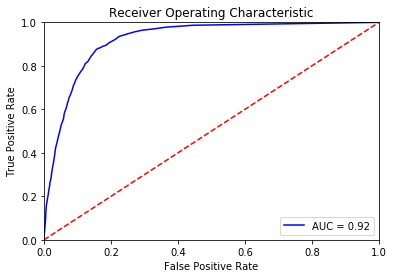

In [85]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = bgcl.predict_proba(X_test)
preds = probs[:,1]
fpr_bgcl, tpr_bgcl, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr_bgcl, tpr_bgcl)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_bgcl, tpr_bgcl, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [86]:
bgcl_Accuracy = accuracy_score(Y_test,y_predict_bgcl)
print("bgcl_Accuracy :",bgcl_Accuracy)
bgcl_Gini = 2*roc_auc - 1
print("bgcl_Gini :",bgcl_Gini)
bgcl_AUC = roc_auc
print("bgcl_AUC :",bgcl_AUC)

bgcl_Accuracy : 0.9012828074314362
bgcl_Gini : 0.8409790261893233
bgcl_AUC : 0.9204895130946616


# Ensemble Learning - AdaBoosting

In [87]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=10)
#abcl = AdaBoostClassifier( n_estimators=50)
abcl = abcl.fit(X_train, Y_train)

In [88]:
y_predict_Abcl = abcl.predict(X_test)
y_predict_Abcl

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

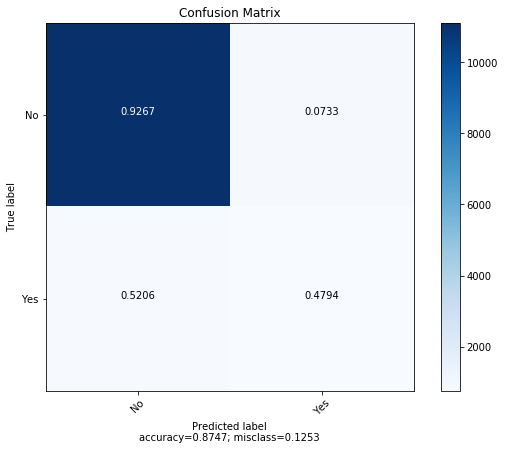

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11985
           1       0.46      0.48      0.47      1579

   micro avg       0.87      0.87      0.87     13564
   macro avg       0.70      0.70      0.70     13564
weighted avg       0.88      0.87      0.88     13564



,Model_Performance
Accuracy,0.874668
Recall,0.479417
Precision,0.462997
f1_Score,0.471064


In [89]:
plot_confusion_matrix(Y_test, y_predict_Abcl, train_char_label,title = "Confusion Matrix", cmap = None, normalize= True)

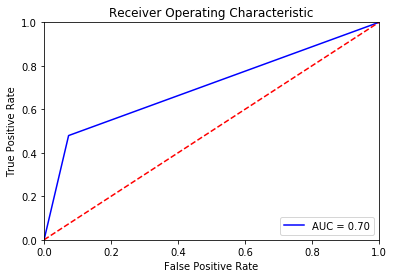

In [90]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = abcl.predict_proba(X_test)
preds = probs[:,1]
fpr_abcl, tpr_abcl, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr_abcl, tpr_abcl)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_abcl, tpr_abcl, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [91]:
abcl_Accuracy = accuracy_score(Y_test,y_predict_Abcl)
print("abcl_Accuracy :",abcl_Accuracy)
abcl_Gini = 2*roc_auc - 1
print("abcl_Gini :",abcl_Gini)
abcl_AUC = roc_auc
print("abcl_AUC :",abcl_AUC)

abcl_Accuracy : 0.8746682394573873
abcl_Gini : 0.40615911328890886
abcl_AUC : 0.7030795566444544


# Ensemble Learning - GradientBoost¶

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate=0.1)
gbcl = gbcl.fit(X_train, Y_train)

In [93]:
y_predict_gbcl = gbcl.predict(X_test)
y_predict_gbcl

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

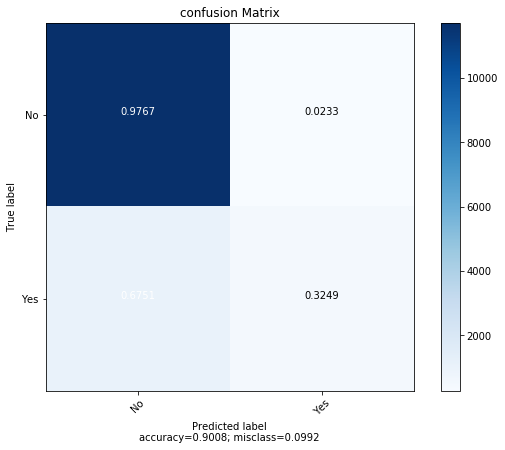

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11985
           1       0.65      0.32      0.43      1579

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.78      0.65      0.69     13564
weighted avg       0.89      0.90      0.89     13564



,Model_Performance
Accuracy,0.900840
Recall,0.324889
Precision,0.647727
f1_Score,0.432729


In [169]:
plot_confusion_matrix(Y_test, y_predict_gbcl, train_char_label,title = "confusion Matrix", cmap = None, normalize= True)

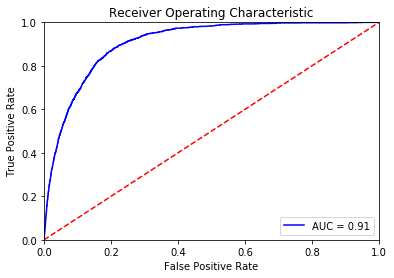

In [95]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = gbcl.predict_proba(X_test)
preds = probs[:,1]
fpr_gbcl, tpr_gbcl, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr_gbcl, tpr_gbcl)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_gbcl, tpr_gbcl, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [96]:
gbcl_Accuracy = accuracy_score(Y_test,y_predict_gbcl)
print("gbcl_Accuracy :",gbcl_Accuracy)
gbcl_Gini = 2*roc_auc - 1
print("gbcl_Gini :",gbcl_Gini)
gbcl_AUC = roc_auc
print("gbcl_AUC :",gbcl_AUC)

gbcl_Accuracy : 0.9008404600412857
gbcl_Gini : 0.8138363792824208
gbcl_AUC : 0.9069181896412104


# Stacking algorithms

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB

In [98]:
estimators = [('rf', RandomForestClassifier(n_estimators=450)),('logistic', LogisticRegression()), ('Naive', MultinomialNB())]
stackingclf = VotingClassifier(estimators=estimators, voting='soft')

In [99]:
nans = lambda df: df[df.isnull().any(axis=1)]
nans(X_train).count()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [100]:
stackingclf.fit(X1_train,Y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_we...erbose=0, warm_start=False)), ('Naive', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [101]:
y_predict_stck = stackingclf.predict(X1_test)

In [102]:
y_predict_stck

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

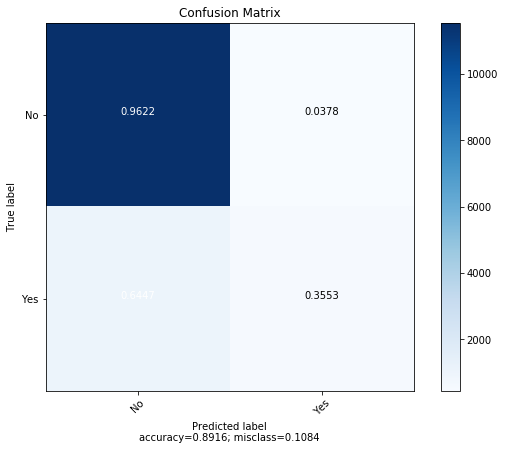

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11985
           1       0.55      0.36      0.43      1579

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.74      0.66      0.69     13564
weighted avg       0.88      0.89      0.88     13564



,Model_Performance
Accuracy,0.891551
Recall,0.355288
Precision,0.553254
f1_Score,0.432703


In [103]:
plot_confusion_matrix(Y_test, y_predict_stck, train_char_label,title = "Confusion Matrix", cmap = None, normalize= True)

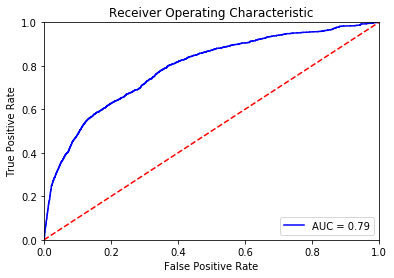

In [104]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = stackingclf.predict_proba(X_test)
preds = probs[:,1]
fpr_stck, tpr_stck, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr_stck, tpr_stck)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_stck, tpr_stck, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [105]:
stck_Accuracy = accuracy_score(Y_test,y_predict_stck)
print("stck_Accuracy :",stck_Accuracy)
stck_Gini = 2*roc_auc - 1
print("stck_Gini :",stck_Gini)
stck_AUC = roc_auc
print("stck_AUC :",stck_AUC)

stck_Accuracy : 0.8915511648481274
stck_Gini : 0.5816994168613234
stck_AUC : 0.7908497084306617


In [106]:
#Additional

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB

In [108]:
estimators = [('rf', RandomForestClassifier(n_estimators=450)),('logistic', LogisticRegression()), ('Naive', MultinomialNB()),('SVM',svm.SVC(kernel = 'rbf', C = 100, probability=True)),('bgcf',BaggingClassifier(base_estimator=dt_model, n_estimators=100))]
stackingclf = VotingClassifier(estimators=estimators, voting='soft')

In [109]:
stackingclf.fit(X1_train,Y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_we...mators=100, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [110]:
y_predict_stck = stackingclf.predict(X1_test)

In [111]:
y_predict_stck

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

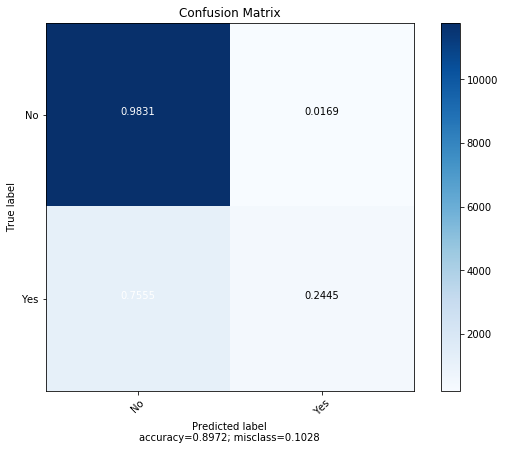

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11985
           1       0.66      0.24      0.36      1579

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.78      0.61      0.65     13564
weighted avg       0.88      0.90      0.88     13564



,Model_Performance
Accuracy,0.897154
Recall,0.244459
Precision,0.656463
f1_Score,0.356253


In [112]:
plot_confusion_matrix(Y_test, y_predict_stck, train_char_label,title = "Confusion Matrix", cmap = None, normalize= True)

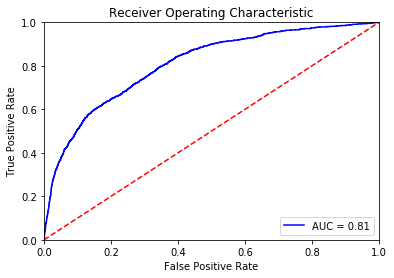

In [113]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = stackingclf.predict_proba(X_test)
preds = probs[:,1]
fpr_stck_5, tpr_stck_5, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr_stck_5, tpr_stck_5)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_stck_5, tpr_stck_5, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [114]:
stck_Accuracy_5 = accuracy_score(Y_test,y_predict_stck)
print("stck_Accuracy_5 :",stck_Accuracy_5)
stck_Gini_5 = 2*roc_auc - 1
print("stck_Gini_5 :",stck_Gini_5)
stck_AUC_5 = roc_auc
print("stck_AUC_5 :",stck_AUC_5)

stck_Accuracy_5 : 0.8971542317900324
stck_Gini_5 : 0.6172731219069223
stck_AUC_5 : 0.8086365609534611


In [115]:
#XGboost

In [116]:
from xgboost import XGBClassifier
gbk_XS = XGBClassifier()
gbk_XS.fit(X_train, Y_train)
y_pred_XS = gbk_XS.predict(X_test)

gbk_XS_score_train = gbk_XS.score(X_train, Y_train)
gbk_XS_score_test = gbk_XS.score(X_test, Y_test)

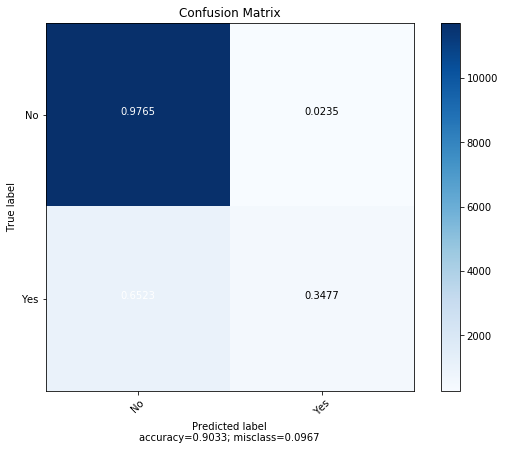

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11985
           1       0.66      0.35      0.46      1579

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.79      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564



,Model_Performance
Accuracy,0.903273
Recall,0.347688
Precision,0.660650
f1_Score,0.455602


In [117]:
plot_confusion_matrix(Y_test, y_pred_XS, train_char_label,title = "Confusion Matrix", cmap = None, normalize= True)

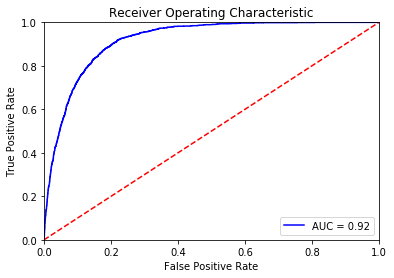

In [118]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = gbk_XS.predict_proba(X_test)
preds = probs[:,1]
fpr_xs, tpr_xs, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr_xs, tpr_xs)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_xs, tpr_xs, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [119]:
xs_Accuracy = accuracy_score(Y_test,y_pred_XS)
print("xs_Accuracy :",xs_Accuracy)
xs_Gini = 2*roc_auc - 1
print("xs_Gini :",xs_Gini)
xs_AUC = roc_auc
print("xs_AUC :",xs_AUC)

xs_Accuracy : 0.903273370687113
xs_Gini : 0.8377090531414213
xs_AUC : 0.9188545265707107


In [123]:
#experiment
from sklearn.ensemble import BaggingClassifier

bgcl_svm = BaggingClassifier(svm.SVC(probability=True,kernel='rbf',C = 100),n_estimators=100)
bgcl_svm =bgcl_svm.fit(X_train,Y_train)
y_predict_bgcl_svm=bgcl_svm.predict(X_test)
y_predict_bgcl_svm

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

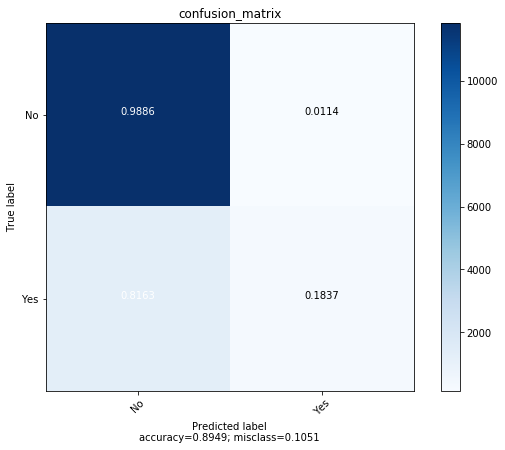

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11985
           1       0.68      0.18      0.29      1579

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.79      0.59      0.62     13564
weighted avg       0.88      0.89      0.87     13564



,Model_Performance
Accuracy,0.894869
Recall,0.183661
Precision,0.679157
f1_Score,0.289133


In [124]:
plot_confusion_matrix(Y_test,y_predict_bgcl_svm,train_char_label,title='confusion_matrix',cmap=None,normalize=True)

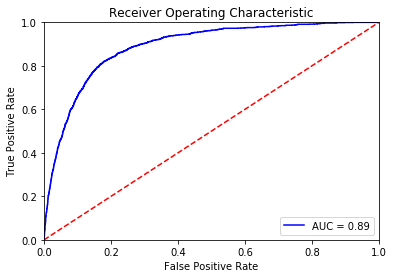

In [125]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = bgcl_svm.predict_proba(X_test)
preds = probs[:,1]
fpr_bgcl_svm, tpr_bgcl_svm, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr_bgcl_svm, tpr_bgcl_svm)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_bgcl_svm, tpr_bgcl_svm, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [126]:

bgcl_SVM_Accuracy_RBF = accuracy_score(Y_test,y_predict_bgcl_svm)
print("bgcl_SVM_Accuracy_RBF :",bgcl_SVM_Accuracy_RBF)
bgcl_SVM_Gini_RBF = 2*roc_auc - 1
print("bgcl_SVM_Gini_RBF :",bgcl_SVM_Gini_RBF)
bgcl_SVM_AUC_RBF = roc_auc    

print("bgcl_SVM_AUC_RBF :",bgcl_SVM_AUC_RBF)

bgcl_SVM_Accuracy_RBF : 0.8948687702742554
bgcl_SVM_Gini_RBF : 0.776588901632635
bgcl_SVM_AUC_RBF : 0.8882944508163175


In [158]:
from sklearn.ensemble import AdaBoostClassifier
abcl_svm=AdaBoostClassifier(svm.SVC(probability=True,kernel='rbf',C=10),n_estimators=50)
abcl_svm=abcl_svm.fit(X_train,Y_train)
y_predict_abcl_svm=abcl_svm.predict(X_test)
y_predict_abcl_svm

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

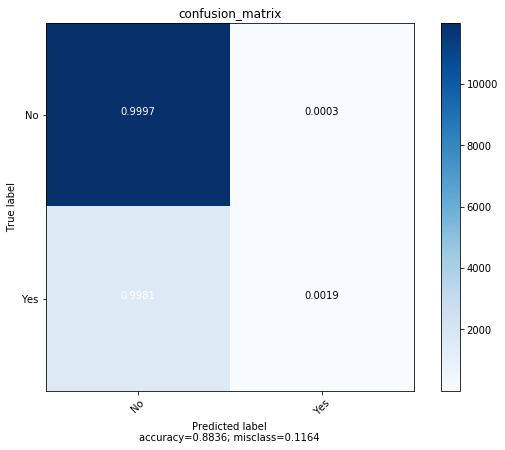

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11985
           1       0.50      0.00      0.00      1579

   micro avg       0.88      0.88      0.88     13564
   macro avg       0.69      0.50      0.47     13564
weighted avg       0.84      0.88      0.83     13564



,Model_Performance
Accuracy,0.883589
Recall,0.001900
Precision,0.500000
f1_Score,0.003785


In [159]:
plot_confusion_matrix(Y_test,y_predict_abcl_svm,train_char_label,title='confusion_matrix',cmap=None,normalize=True)

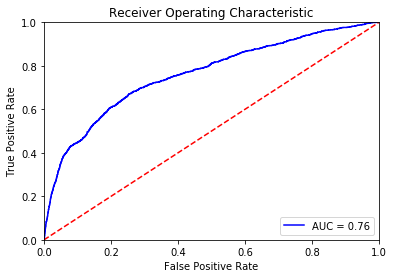

In [160]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = abcl_svm.predict_proba(X_test)
preds = probs[:,1]
fpr_abcl_svm, tpr_abcl_svm, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr_abcl_svm, tpr_abcl_svm)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_abcl_svm, tpr_abcl_svm, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [161]:

abcl_SVM_Accuracy_RBF = accuracy_score(Y_test,y_predict_abcl_svm)
print("abcl_SVM_Accuracy_RBF :",abcl_SVM_Accuracy_RBF)
abcl_SVM_Gini_RBF = 2*roc_auc - 1
print("abcl_SVM_Gini_RBF :",abcl_SVM_Gini_RBF)
abcl_SVM_AUC_RBF = roc_auc
print("abcl_SVM_AUC_RBF :",abcl_SVM_AUC_RBF)

abcl_SVM_Accuracy_RBF : 0.8835889118254202
abcl_SVM_Gini_RBF : 0.5220602700811101
abcl_SVM_AUC_RBF : 0.7610301350405551


In [162]:
from sklearn.ensemble import BaggingClassifier
#from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
bgcl_rf=BaggingClassifier(RandomForestClassifier(n_estimators=75,random_state=RandomState),n_estimators=25)
bgcl_rf=bgcl_rf.fit(X_train,Y_train)
y_predict_bgcl_rf=bgcl_rf.predict(X_test)
y_predict_bgcl_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

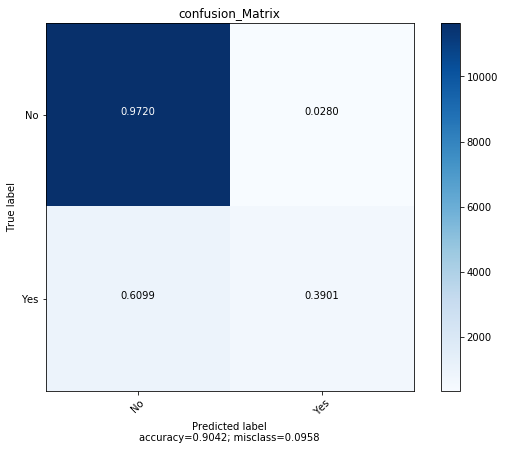

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11985
           1       0.65      0.39      0.49      1579

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.79      0.68      0.72     13564
weighted avg       0.89      0.90      0.89     13564



,Model_Performance
Accuracy,0.904232
Recall,0.390120
Precision,0.647059
f1_Score,0.486764


In [163]:
plot_confusion_matrix(Y_test,y_predict_bgcl_rf,train_char_label,title='confusion_Matrix',cmap=None,normalize=True)

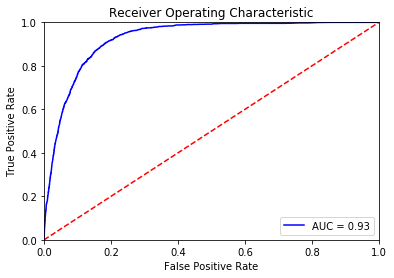

In [164]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = bgcl_rf.predict_proba(X_test)
preds = probs[:,1]
fpr_bgcl_rf, tpr_bgcl_rf, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr_bgcl_rf, tpr_bgcl_rf)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_bgcl_rf, tpr_bgcl_rf, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [165]:

bgcl_rf_Accuracy = accuracy_score(Y_test,y_predict_bgcl_rf)
print("bgcl_rf_Accuracy :",bgcl_rf_Accuracy)
bgcl_rf_Gini = 2*roc_auc - 1
print("bgcl_rf_Gini :",bgcl_rf_Gini)
bgcl_rf_AUC = roc_auc
print("bgcl_rf_AUC :",bgcl_rf_AUC)

bgcl_rf_Accuracy : 0.9042317900324388
bgcl_rf_Gini : 0.8537555520503648
bgcl_rf_AUC : 0.9268777760251824


In [166]:
Compare = [[Logistic_Accuracy,Logistic_Gini,Logistic_AUC],
           [Naive_Accuracy,Naive_Gini,Naive_AUC],[KNN_Accuracy,KNN_Gini,KNN_AUC],
            [SVM_Accuracy_RBF,SVM_Gini_RBF,SVM_AUC_RBF],[DT_Predictions_Accuracy,DT_Predictions_Gini,DT_Predictions_auc],
          [DT_Predictions_Accuracy_reg,DT_Predictions_Gini_reg,DT_Predictions_auc_reg],[rfcl_Accuracy,rfcl_Gini,rfcl_AUC],
           [bgcl_Accuracy,bgcl_Gini,bgcl_AUC],[abcl_Accuracy,abcl_Gini,abcl_AUC],[gbcl_Accuracy,gbcl_Gini,gbcl_AUC],
          [stck_Accuracy,stck_Gini,stck_AUC],[stck_Accuracy_5,stck_Gini_5,stck_AUC_5],[xs_Accuracy,xs_Gini,xs_AUC],
          [bgcl_SVM_Accuracy_RBF,bgcl_SVM_Gini_RBF,bgcl_SVM_AUC_RBF],[abcl_SVM_Accuracy_RBF,abcl_SVM_Gini_RBF,abcl_SVM_AUC_RBF],
          [bgcl_rf_Accuracy,bgcl_rf_Gini,bgcl_rf_AUC]]

In [167]:
Compare_Models = pandas.DataFrame(Compare, columns= ['Accuracy','Gini Index', 'AUC'], index=['Logistic','Naive','KNN','SVM_RBF',
                                                                                            'Decision_tree','Decision_tree_reg',
                                                                                            'Random_forest','Bagging Classififers',
                                                                                            'Adaboost Classfiers','Gradient Boost Classifiers',
                                                                                            'Stacking/Voting Classifiers','Stacking with Algo',
                                                                                            'Xtream Gradient Boost classifiers','Bagging_with_SVM',
                                                                                            'Adaboost_with_SVM','Baggin_with_readom_forest_classifiers'])
Compare_Models

,Accuracy,Gini Index,AUC
Logistic,0.895237,0.750265,0.875133
Naive,0.827485,0.610579,0.805289
KNN,0.894795,0.729454,0.864727
SVM_RBF,0.894058,0.701928,0.850964
Decision_tree,0.874078,0.400543,0.700271
Decision_tree_reg,0.897818,0.778761,0.889380
Random_forest,0.904600,0.853672,0.926836
Bagging Classififers,0.901283,0.840979,0.920490
Adaboost Classfiers,0.874668,0.406159,0.703080
Gradient Boost Classifiers,0.900840,0.813836,0.906918


Final Conclusion :
    1. In given Algo project Random forest works best with highest Accurecy is 90.5% and Gini index is 84.1% 
    AUC is almost 93%.
    2. Begging is very close to Random forest in term of Accurecy/Gini/AUC.
Why RF and Begging performed well:

    > since this both algo used weak learner for leanring and high randomisation in tress lead this both algo performed 
    really well.
    
    > Precision and Recall is higest for RF for both combination.

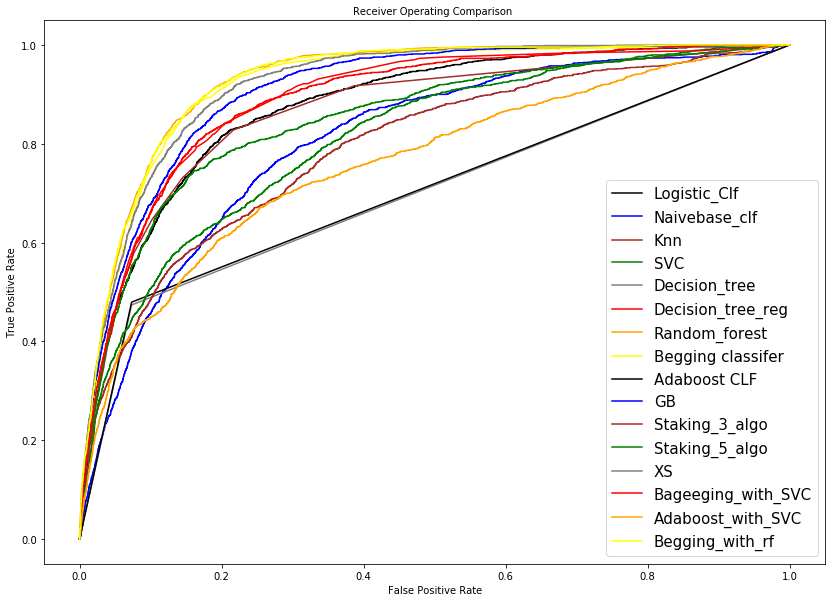

In [168]:
plt.figure(figsize=[14,10])

plt.plot(fpr_log, tpr_log ,'b', label = 'Logistic_Clf', color='black')
plt.plot(fpr_nai, tpr_nai, 'b', label = 'Naivebase_clf', color='blue')
plt.plot(fpr_knn, tpr_knn, 'b', label = 'Knn', color='brown')
plt.plot(fpr_svm, tpr_svm, 'b', label = 'SVC', color='green')
plt.plot(fpr_dt, tpr_dt, 'b', label = 'Decision_tree', color='grey')
plt.plot(fpr_dt_reg, tpr_tt_reg, 'b', label = 'Decision_tree_reg', color='red')
plt.plot(fpr_rf, tpr_rf, 'b', label = 'Random_forest', color='orange')
plt.plot(fpr_bgcl, tpr_bgcl, 'b', label = 'Begging classifer', color='yellow')
plt.plot(fpr_abcl, tpr_abcl, 'b', label = 'Adaboost CLF', color='black')
plt.plot(fpr_gbcl, tpr_gbcl, 'b', label = 'GB', color='blue')
plt.plot(fpr_stck, tpr_stck, 'b', label = 'Staking_3_algo', color='brown')
plt.plot(fpr_stck_5, tpr_stck_5, 'b', label = 'Staking_5_algo', color='green')
plt.plot(fpr_xs, tpr_xs, 'b', label = 'XS', color='grey')
plt.plot(fpr_bgcl_svm, tpr_bgcl_svm, 'b', label = 'Bageeging_with_SVC', color='red')
plt.plot(fpr_abcl_svm, tpr_abcl_svm, 'b', label = 'Adaboost_with_SVC', color='orange')
plt.plot(fpr_bgcl_rf, tpr_bgcl_rf, 'b', label = 'Begging_with_rf', color='yellow')

plt.title('Receiver Operating Comparison ',fontsize=10)
plt.ylabel('True Positive Rate',fontsize=10)
plt.xlabel('False Positive Rate',fontsize=10)
plt.legend(loc = 'lower right', prop={'size':15})

plt.subplots_adjust(wspace=0.2)
#lt.tight_layout() 

In [ ]:
#ROC higest in case  for RF and Begging.